Analyis of opensource researchGroup repositories of 


Import required libraries 

In [1]:
# Importing necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

Datasets


In [2]:
# Importing necessary libraries
import pandas as pd

# Reload the CSV file into a DataFrame
df = pd.read_csv('combined.csv')

# Display basic information about the DataFrame
df_info = df.info()

# Display first few rows of the DataFrame
df_head = df.head()

# Show basic statistics of numerical columns
df_describe = df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 93 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         53 non-null     object 
 1   owner                        53 non-null     object 
 2   description                  38 non-null     object 
 3   language                     47 non-null     object 
 4   forks_count                  53 non-null     int64  
 5   stargazers_count             53 non-null     int64  
 6   events_url                   53 non-null     object 
 7   tags_url                     53 non-null     object 
 8   private                      53 non-null     bool   
 9   notifications_url            53 non-null     object 
 10  blobs_url                    53 non-null     object 
 11  deployments_url              53 non-null     object 
 12  keys_url                     53 non-null     object 
 13  archived              

Descritpive information 

| Research Group  | Total Repositories | Repositories with Test Folder | Avg Fair Score | Repositories with Automated Testing |
|-----------------|--------------------|-------------------------------|----------------|------------------------------------|
| aeya            | 11                 | 1                             | 1.27           | 0                                  |
| cslm-lab        | 5                  | 0                             | 1.00           | 0                                  |
| discourse-lab   | 13                 | 0                             | 1.38           | 0                                  |
| krr             | 22                 | 5                             | 1.36           | 1                                  |
| macroecology    | 5                  | 0                             | 1.60           | 0                                  |
| potassco        | 72                 | 19                            | 1.85           | 5                                  |
| rs-esp          | 46                 | 1                             | 1.87           | 0                                  |



# Analysis of Research Groups 

## For all repositories collected. 

1. Average fork count by research Groups : 
sum of ```fork``` count/ number of reposiroties

2. Average Startgazers count by Research Groups : 
sum of ```stargazers_count``` count/ number of reposiroties

3. Avarage Watchers count by research group : 
sum of ```watchers``` count/ number of reposiroties

4. Repositories with open issue : 
sum of ```open_issues``` count/ number of reposirotie


| Research Group  | Total Repositories |
|-----------------|--------------------|
| aeya            | 11                 |         
| cslm-lab        | 5                  |
| discourse-lab   | 13                 |
| krr             | 22                 | 
| macroecology    | 5                  | 
| potassco        | 72                 | 
| rs-esp          | 46                 | 


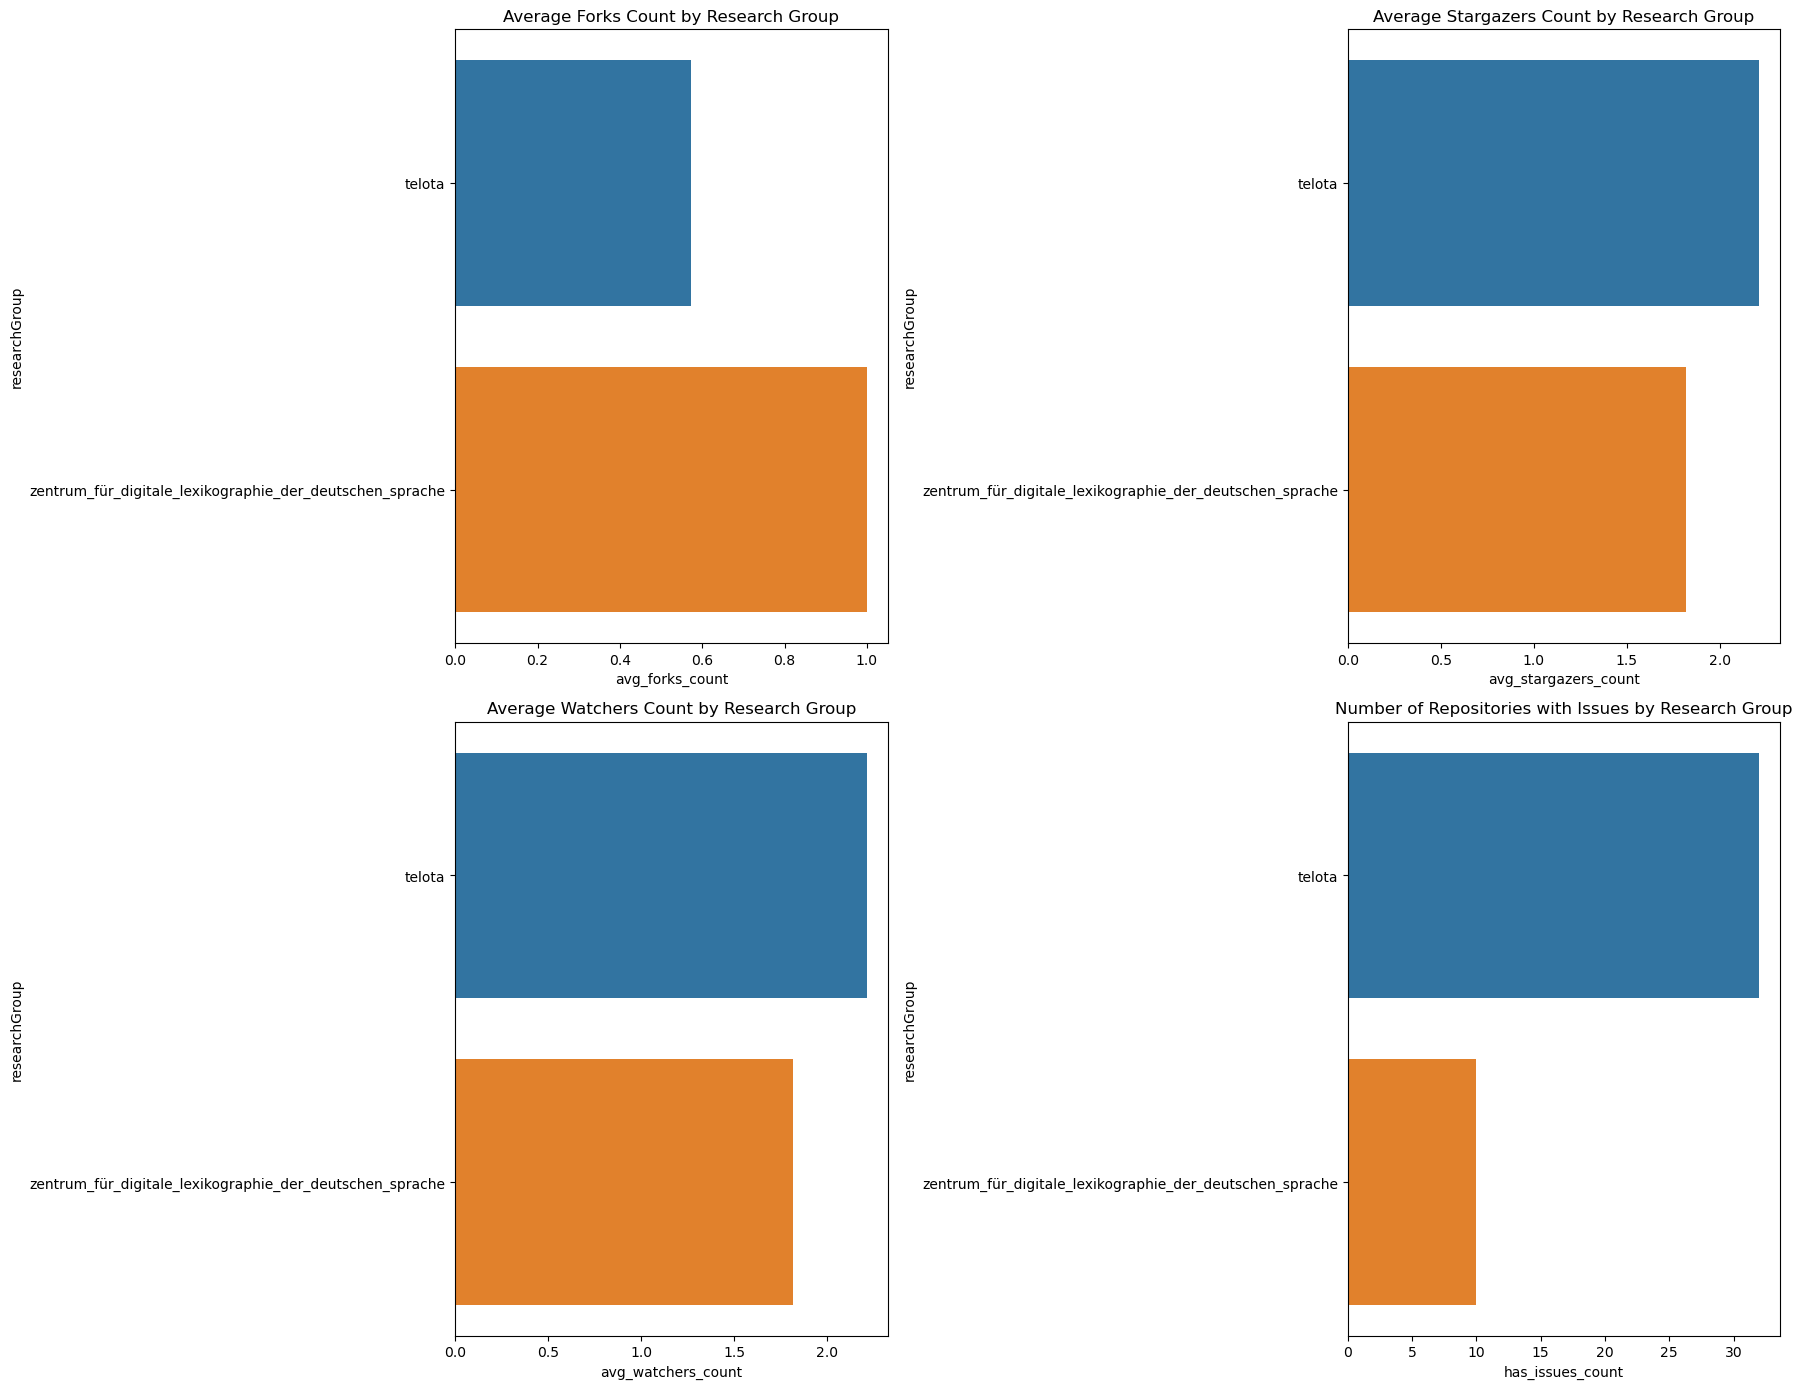

In [3]:
# Group the data by 'researchGroup' and calculate the average for 'forks_count', 'stargazers_count', 'watchers_count', and the sum for 'has_issues'
grouped_metrics_data = df[df['organisation'] == 'berlin-brandenburgische_akademie_der_wissenschaften'].groupby('researchGroup').agg(
    avg_forks_count=pd.NamedAgg(column='forks_count', aggfunc='mean'),
    avg_stargazers_count=pd.NamedAgg(column='stargazers_count', aggfunc='mean'),
    avg_watchers_count=pd.NamedAgg(column='watchers_count', aggfunc='mean'),  # Assuming the column 'watchers_count' exists
    has_issues_count=pd.NamedAgg(column='has_issues', aggfunc='sum')  # Assuming the column 'has_issues' exists as a boolean
).reset_index()

# Create visualizations for the aggregated metrics
fig, ax = plt.subplots(2, 2, figsize=(18, 14))

# Plot for avg_forks_count
sns.barplot(x='avg_forks_count', y='researchGroup', data=grouped_metrics_data, ax=ax[0, 0])
ax[0, 0].set_title('Average Forks Count by Research Group')

# Plot for avg_stargazers_count
sns.barplot(x='avg_stargazers_count', y='researchGroup', data=grouped_metrics_data, ax=ax[0, 1])
ax[0, 1].set_title('Average Stargazers Count by Research Group')

# Plot for avg_watchers_count
sns.barplot(x='avg_watchers_count', y='researchGroup', data=grouped_metrics_data, ax=ax[1, 0])
ax[1, 0].set_title('Average Watchers Count by Research Group')

# Plot for has_issues_count
sns.barplot(x='has_issues_count', y='researchGroup', data=grouped_metrics_data, ax=ax[1, 1])
ax[1, 1].set_title('Number of Repositories with Issues by Research Group')

plt.tight_layout()
plt.show()

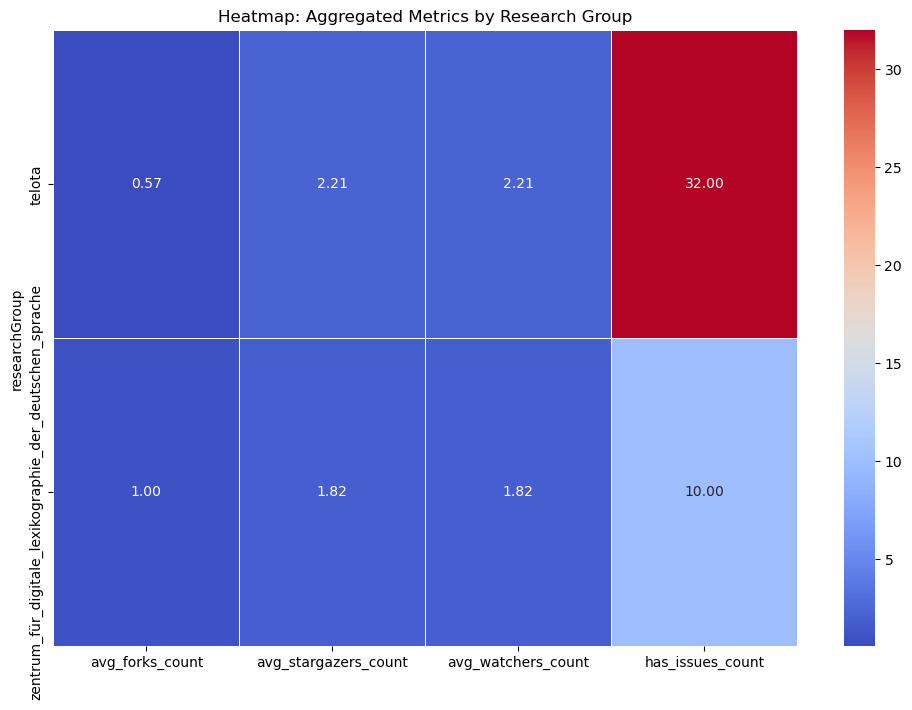

In [4]:
# Create a heatmap to show the relationship between research groups and the aggregated metrics
heatmap_data_metrics = grouped_metrics_data.set_index('researchGroup')

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data_metrics, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap: Aggregated Metrics by Research Group')
plt.show()

Heat map visualising aggregated research group '''y-axis''' to ```Average fork count``` , ```Average Startgazers count``` ,```Average watchers count```, ```Average fork count``` on the ```x-axis```

## Analysis for repositories with test folder


1. Average fork count by research Groups : 
sum of ```fork``` count/ number of reposiroties

2. Average Startgazers count by Research Groups : 
sum of ```stargazers_count``` count/ number of reposiroties

3. Avarage Watchers count by research group : 
sum of ```watchers``` count/ number of reposiroties

4. Repositories with open issue : 
sum of ```open_issues``` count/ number of reposirotie

With the repositoires that has folder named ```test/tests```in it

| Research Group  | Total Repositories | Repositories with Test Folder | 
|-----------------|--------------------|-------------------------------|
| aeya            | 11                 | 1                             |
| cslm-lab        | 5                  | 0                             | 
| discourse-lab   | 13                 | 0                             | 
| krr             | 22                 | 5                             |
| macroecology    | 5                  | 0                             | 
| potassco        | 72                 | 19                            | 
| rs-esp          | 46                 | 1                             | 


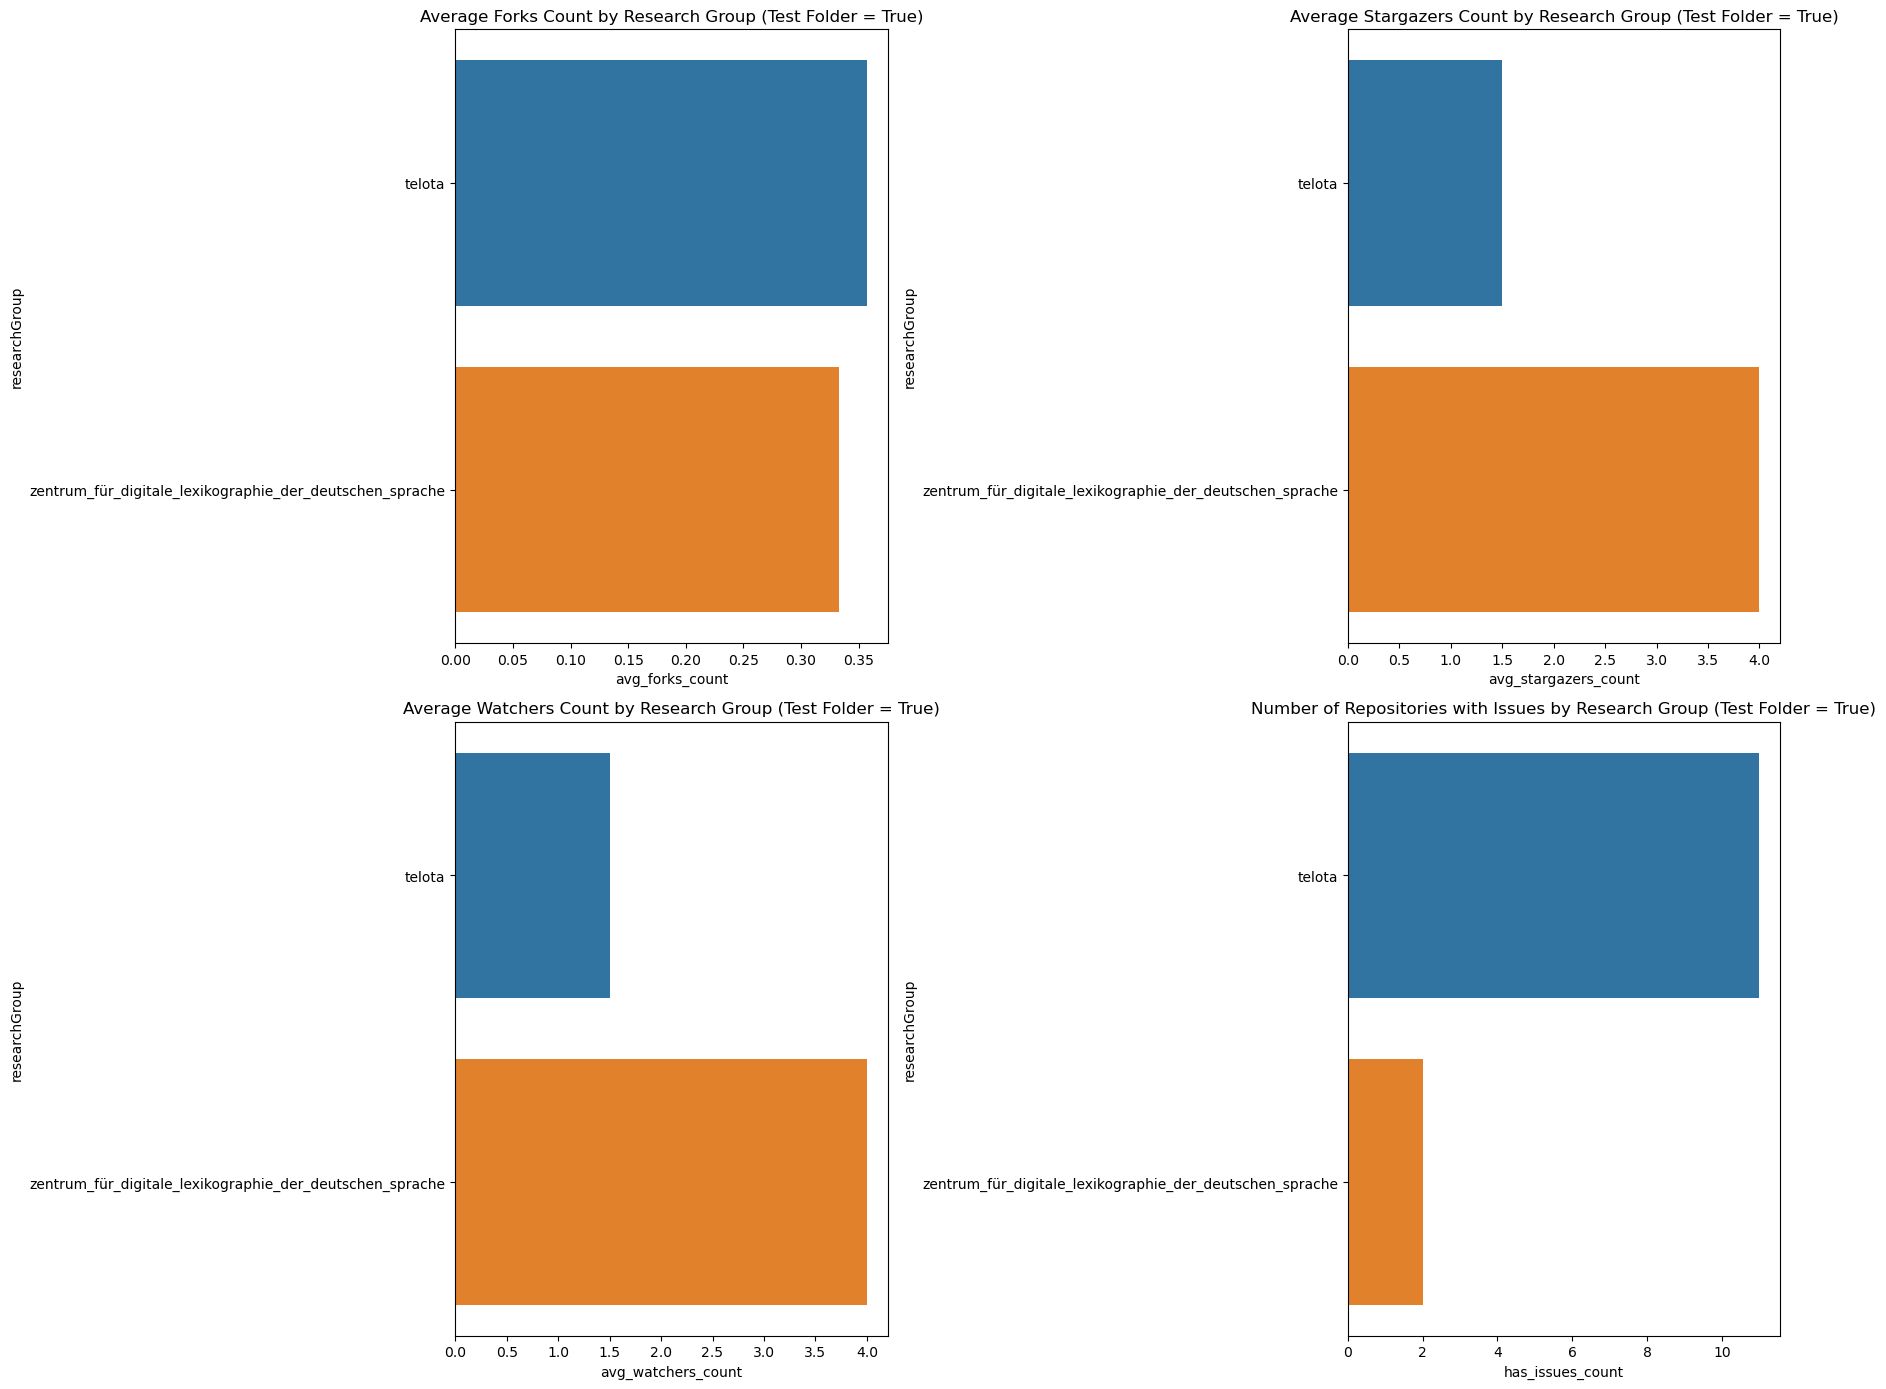

In [8]:
# Filter the data to include only rows where test_folder is true
test_folder_data = df[(df['organisation'] == 'berlin-brandenburgische_akademie_der_wissenschaften') & (df['test_folder'] == True)] # change the organisation name accoring to analysis 

# Group the data by 'researchGroup' and calculate the metrics
grouped_test_folder_metrics = test_folder_data.groupby('researchGroup').agg(
    avg_forks_count=pd.NamedAgg(column='forks_count', aggfunc='mean'),
    avg_stargazers_count=pd.NamedAgg(column='stargazers_count', aggfunc='mean'),
    avg_watchers_count=pd.NamedAgg(column='watchers_count', aggfunc='mean'),  # Assuming the column 'watchers_count' exists
    has_issues_count=pd.NamedAgg(column='has_issues', aggfunc='sum')  # Assuming the column 'has_issues' exists as a boolean
).reset_index()



# Create bar graphs for the aggregated metrics for repositories where test_folder is true
fig, ax = plt.subplots(2, 2, figsize=(18, 14))

# Plot for avg_forks_count
sns.barplot(x='avg_forks_count', y='researchGroup', data=grouped_test_folder_metrics, ax=ax[0, 0])
ax[0, 0].set_title('Average Forks Count by Research Group (Test Folder = True)')

# Plot for avg_stargazers_count
sns.barplot(x='avg_stargazers_count', y='researchGroup', data=grouped_test_folder_metrics, ax=ax[0, 1])
ax[0, 1].set_title('Average Stargazers Count by Research Group (Test Folder = True)')

# Plot for avg_watchers_count
sns.barplot(x='avg_watchers_count', y='researchGroup', data=grouped_test_folder_metrics, ax=ax[1, 0])
ax[1, 0].set_title('Average Watchers Count by Research Group (Test Folder = True)')

# Plot for has_issues_count
sns.barplot(x='has_issues_count', y='researchGroup', data=grouped_test_folder_metrics, ax=ax[1, 1])
ax[1, 1].set_title('Number of Repositories with Issues by Research Group (Test Folder = True)')

plt.tight_layout()
plt.show()

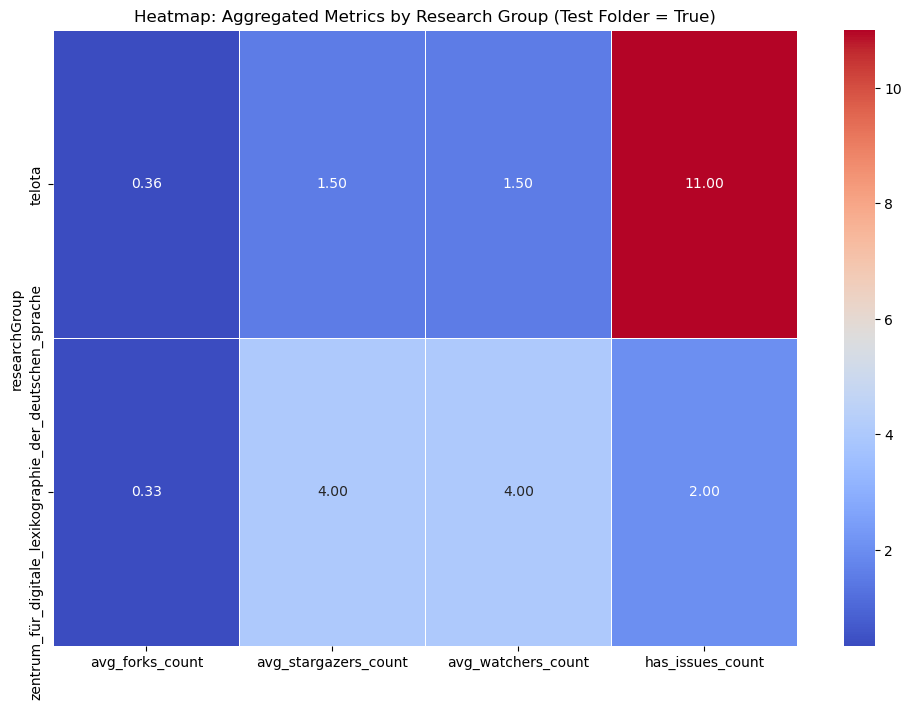

In [7]:


# Create a heatmap for repositories where test_folder is true
plt.figure(figsize=(12, 8))
sns.heatmap(grouped_test_folder_metrics.set_index('researchGroup'), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap: Aggregated Metrics by Research Group (Test Folder = True)')
plt.show()

Heat map visualising aggregated research group '''y-axis''' to ```Average fork count``` , ```Average Startgazers count``` ,```Average watchers count```, ```Average fork count``` on the ```x-axis``` which has ```test_folders```in the repository 

## Analysis for repositories with automated_testing 

| Research Group  | Repositories with Automated Testing |
|-----------------|------------------------------------|
| aeya            | 0                                  |
| cslm-lab        | 0                                  |
| discourse-lab   | 0                                  |
| krr             | 1                                  |
| macroecology    | 0                                  |
| potassco        | 5                                  |
| rs-esp          | 0                                  |


5. Average "Has Issues" Indicator by Organisation

This bar chart shows the average has_issues indicator for each organization's repositories. A higher value could mean that the repositories are more likely to have issues, which is a good practice for collaborative development.

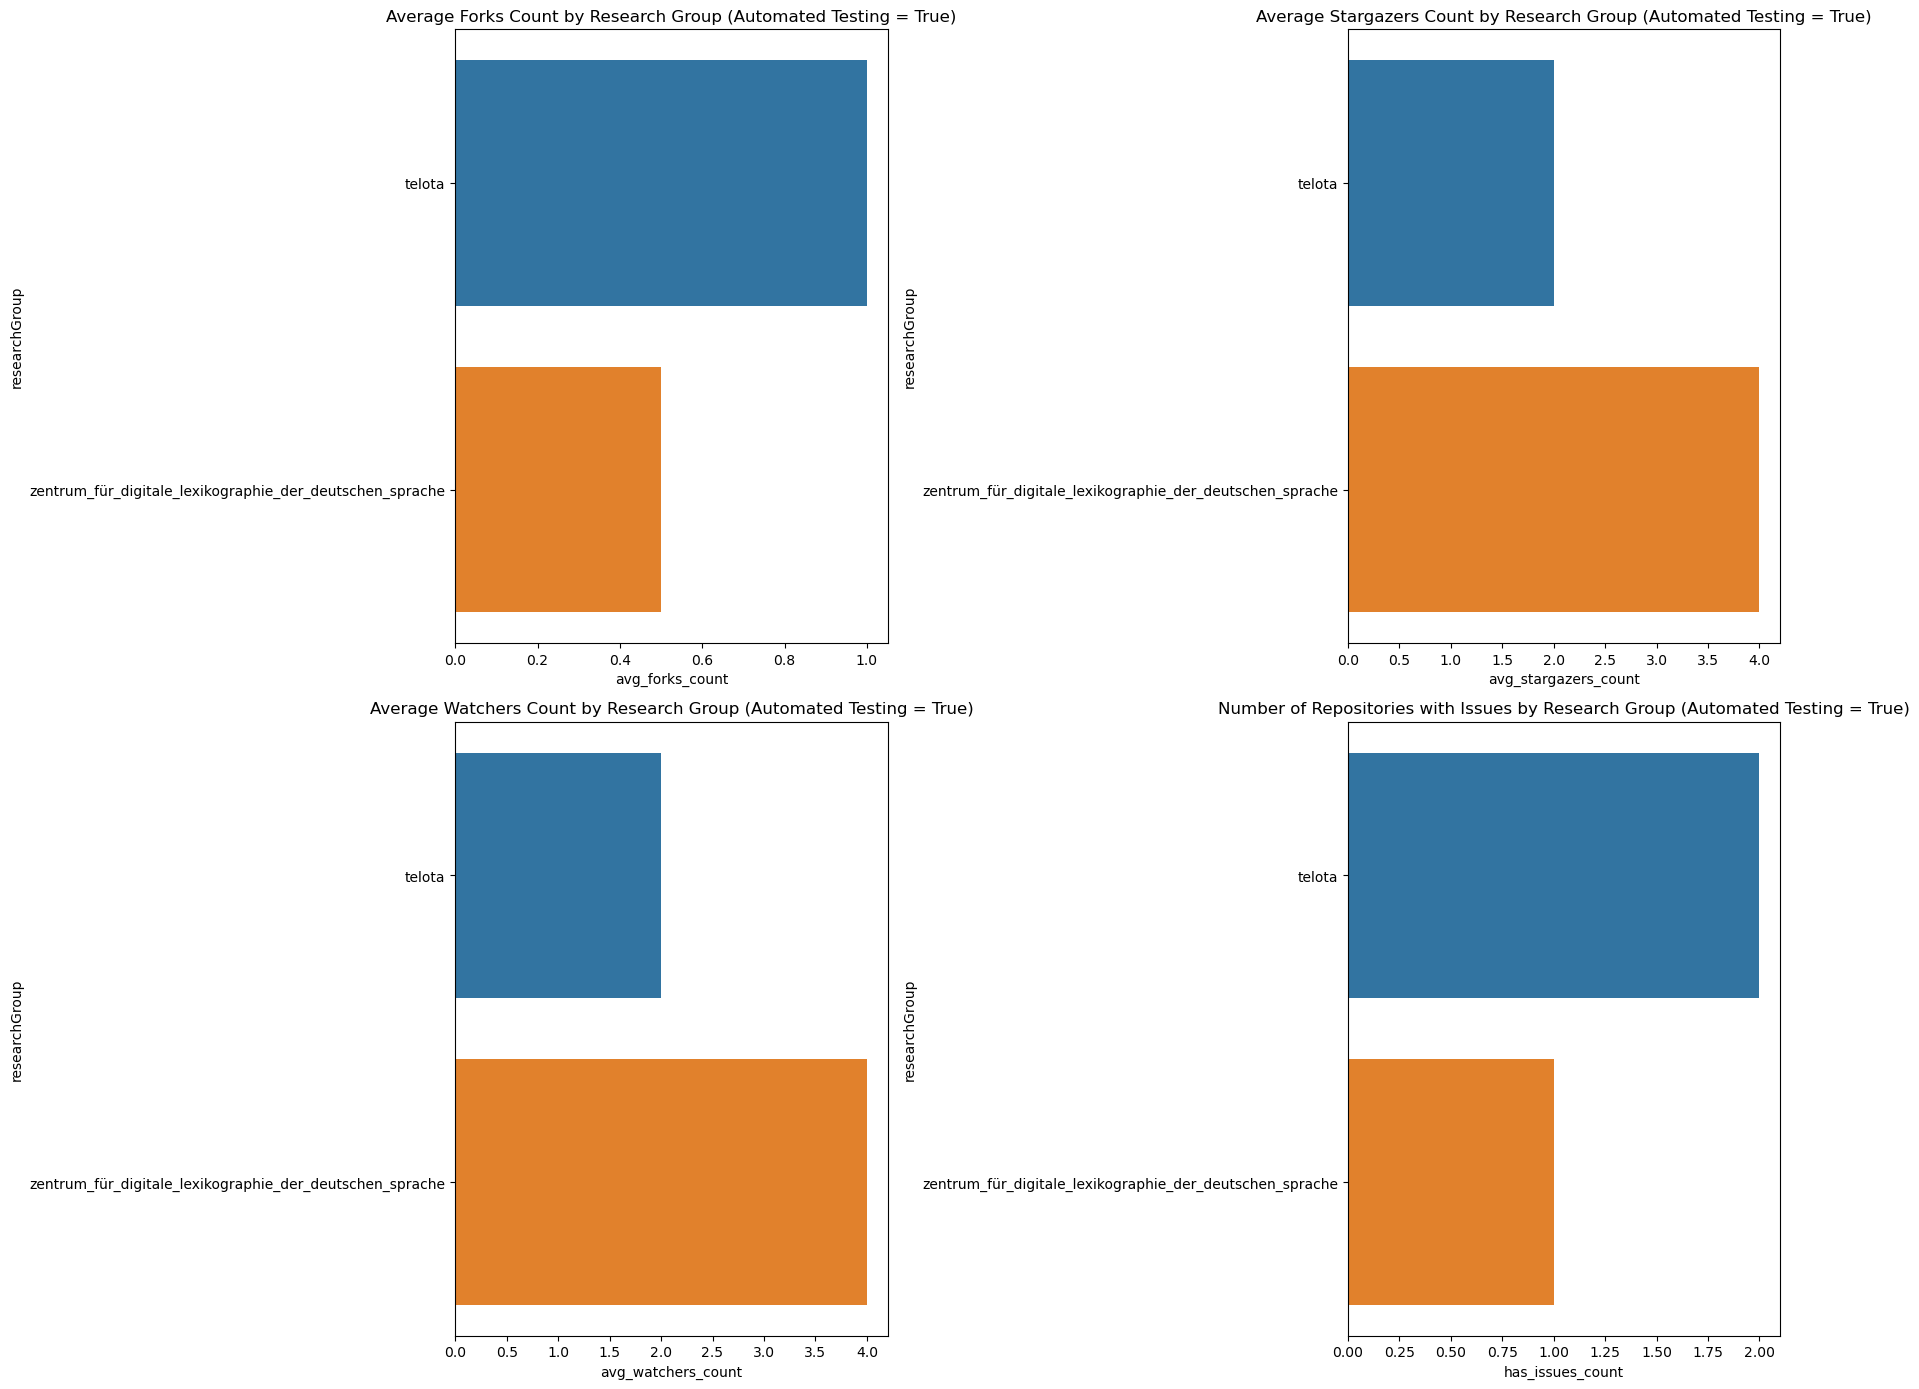

In [9]:
# Group the data by 'researchGroup' and calculate the metrics for repositories where automated_testing is true
grouped_automated_testing_metrics = df[(df['organisation'] == 'berlin-brandenburgische_akademie_der_wissenschaften') & (df['automated_testing'] == True)].groupby('researchGroup').agg(
    avg_forks_count=pd.NamedAgg(column='forks_count', aggfunc='mean'),
    avg_stargazers_count=pd.NamedAgg(column='stargazers_count', aggfunc='mean'),
    avg_watchers_count=pd.NamedAgg(column='watchers_count', aggfunc='mean'),
    has_issues_count=pd.NamedAgg(column='has_issues', aggfunc='sum')
).reset_index()



# Create bar graphs for these metrics
fig, ax = plt.subplots(2, 2, figsize=(18, 14))

# Plot for avg_forks_count
sns.barplot(x='avg_forks_count', y='researchGroup', data=grouped_automated_testing_metrics, ax=ax[0, 0])
ax[0, 0].set_title('Average Forks Count by Research Group (Automated Testing = True)')

# Plot for avg_stargazers_count
sns.barplot(x='avg_stargazers_count', y='researchGroup', data=grouped_automated_testing_metrics, ax=ax[0, 1])
ax[0, 1].set_title('Average Stargazers Count by Research Group (Automated Testing = True)')

# Plot for avg_watchers_count
sns.barplot(x='avg_watchers_count', y='researchGroup', data=grouped_automated_testing_metrics, ax=ax[1, 0])
ax[1, 0].set_title('Average Watchers Count by Research Group (Automated Testing = True)')

# Plot for has_issues_count
sns.barplot(x='has_issues_count', y='researchGroup', data=grouped_automated_testing_metrics, ax=ax[1, 1])
ax[1, 1].set_title('Number of Repositories with Issues by Research Group (Automated Testing = True)')

plt.tight_layout()
plt.show()

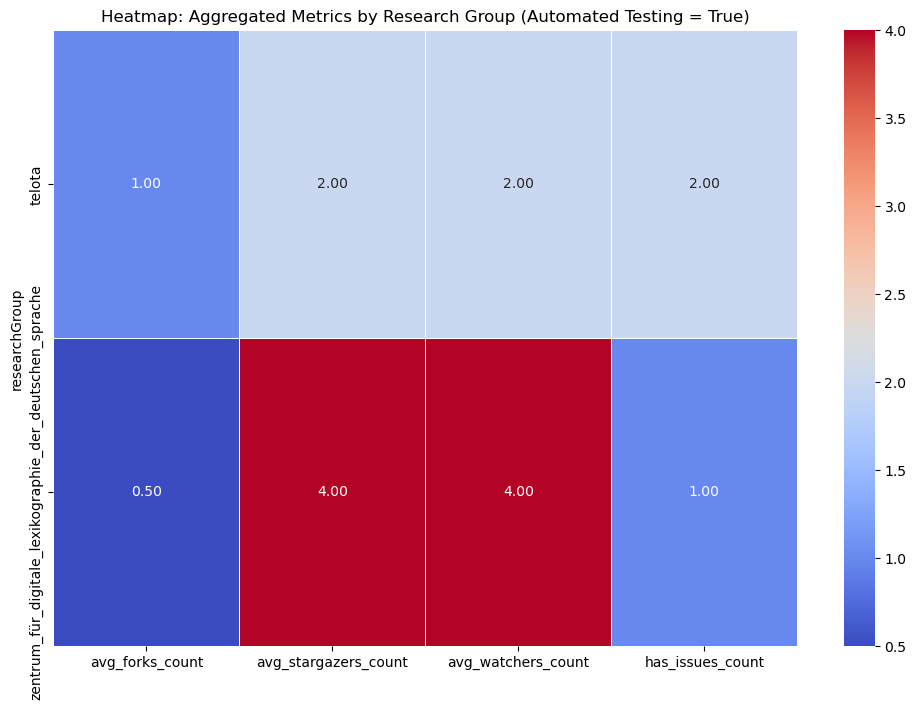

In [10]:


# Create a heatmap for these metrics
plt.figure(figsize=(12, 8))
sns.heatmap(grouped_automated_testing_metrics.set_index('researchGroup'), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap: Aggregated Metrics by Research Group (Automated Testing = True)')
plt.show()


# Analysis based on FAIR score 

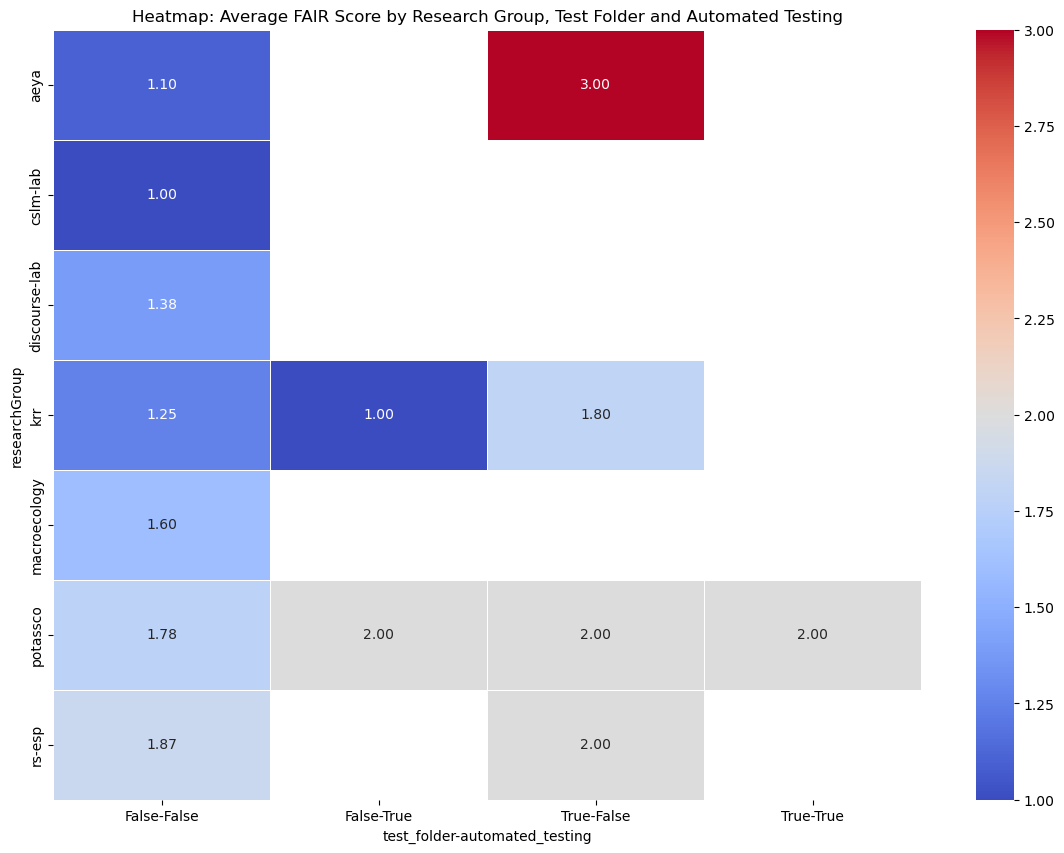

In [53]:
# Filter for University of Potsdam
df_potsdam = df[df['organisation'] == 'berlin-brandenburgische_akademie_der_wissenschaften']

# Group the data based on 'test_folder' and 'automated_testing' and then calculate the average 'fair_score'
grouped_fair_score = df_potsdam.groupby(['test_folder', 'automated_testing']).agg(
    avg_fair_score=pd.NamedAgg(column='fair_score', aggfunc='mean'),
    count=pd.NamedAgg(column='name', aggfunc='count')
).reset_index()

grouped_fair_score
# Group the data based on 'researchGroup', 'test_folder', and 'automated_testing', and then calculate the average 'fair_score'
grouped_fair_score_researchGroup = df_potsdam.groupby(['researchGroup', 'test_folder', 'automated_testing']).agg(
    avg_fair_score=pd.NamedAgg(column='fair_score', aggfunc='mean'),
    count=pd.NamedAgg(column='name', aggfunc='count')
).reset_index()

# Create a heatmap to visualize the average FAIR score with respect to researchGroup, test_folder, and automated_testing
plt.figure(figsize=(14, 10))
sns.heatmap(pd.pivot_table(grouped_fair_score_researchGroup, values='avg_fair_score', index=['researchGroup'], columns=['test_folder', 'automated_testing']), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap: Average FAIR Score by Research Group, Test Folder and Automated Testing')
plt.show()

# Analysis based on Languages

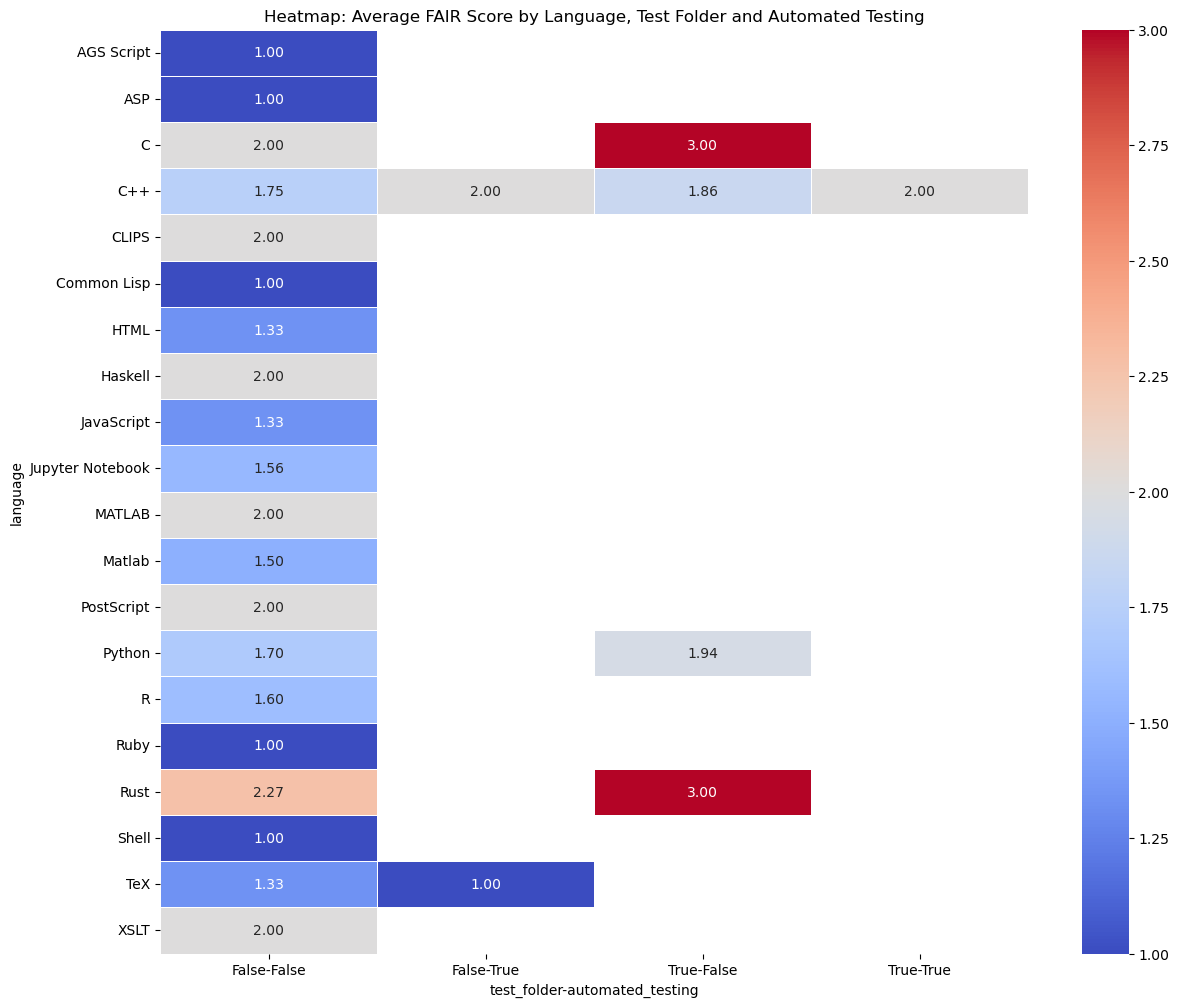

In [63]:
df_potsdam = df[df['organisation'] == 'university_of_potsdam']

# Group the data based on 'test_folder' and 'automated_testing' and then calculate the average 'fair_score'
grouped_fair_score = df_potsdam.groupby(['test_folder', 'automated_testing']).agg(
    avg_fair_score=pd.NamedAgg(column='fair_score', aggfunc='mean'),
    count=pd.NamedAgg(column='name', aggfunc='count')
).reset_index()

grouped_fair_score

# Group the data based on 'language', 'test_folder', and 'automated_testing', and then calculate the average 'fair_score'
grouped_fair_score_language = df_potsdam.groupby(['language', 'test_folder', 'automated_testing']).agg(
    avg_fair_score=pd.NamedAgg(column='fair_score', aggfunc='mean'),
    count=pd.NamedAgg(column='name', aggfunc='count')
).reset_index()

# Create a heatmap to visualize the average FAIR score with respect to language, test_folder, and automated_testing
plt.figure(figsize=(14, 12))
sns.heatmap(pd.pivot_table(grouped_fair_score_language, values='avg_fair_score', index=['language'], columns=['test_folder', 'automated_testing']), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap: Average FAIR Score by Language, Test Folder and Automated Testing')
plt.show()

### End

Plot 1: Average Forks Count by Fair Score

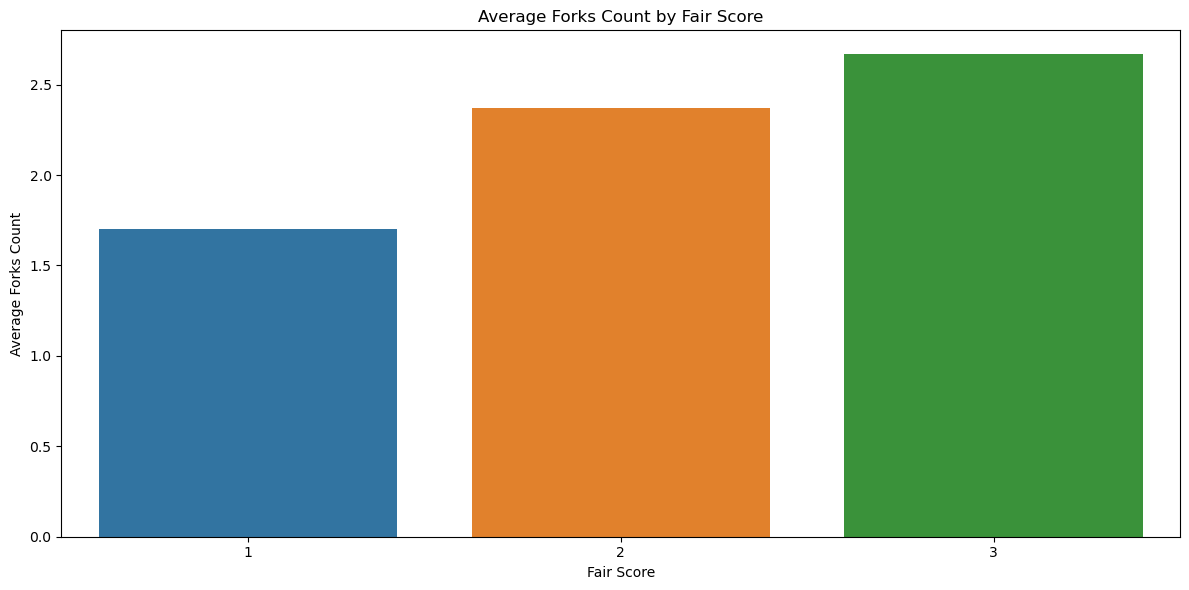

In [57]:
plt.figure(figsize=(12, 6))
sns.barplot(x='fair_score', y='forks_count', data=df_grouped_with_fair_stats)
plt.title('Average Forks Count by Fair Score')
plt.xlabel('Fair Score')
plt.ylabel('Average Forks Count')
plt.tight_layout()
plt.show()

Plot 2: Average Stargazers Count by Fair Score

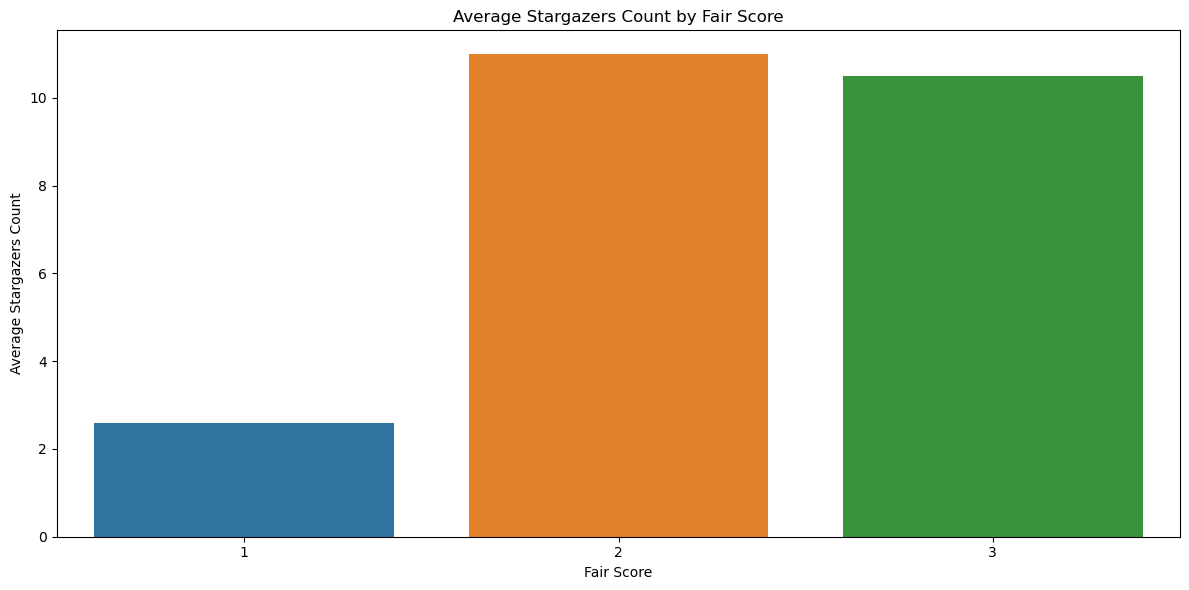

In [58]:
plt.figure(figsize=(12, 6))
sns.barplot(x='fair_score', y='stargazers_count', data=df_grouped_with_fair_stats)
plt.title('Average Stargazers Count by Fair Score')
plt.xlabel('Fair Score')
plt.ylabel('Average Stargazers Count')
plt.tight_layout()
plt.show()

Plot 3: Average Watchers Count by Fair Score

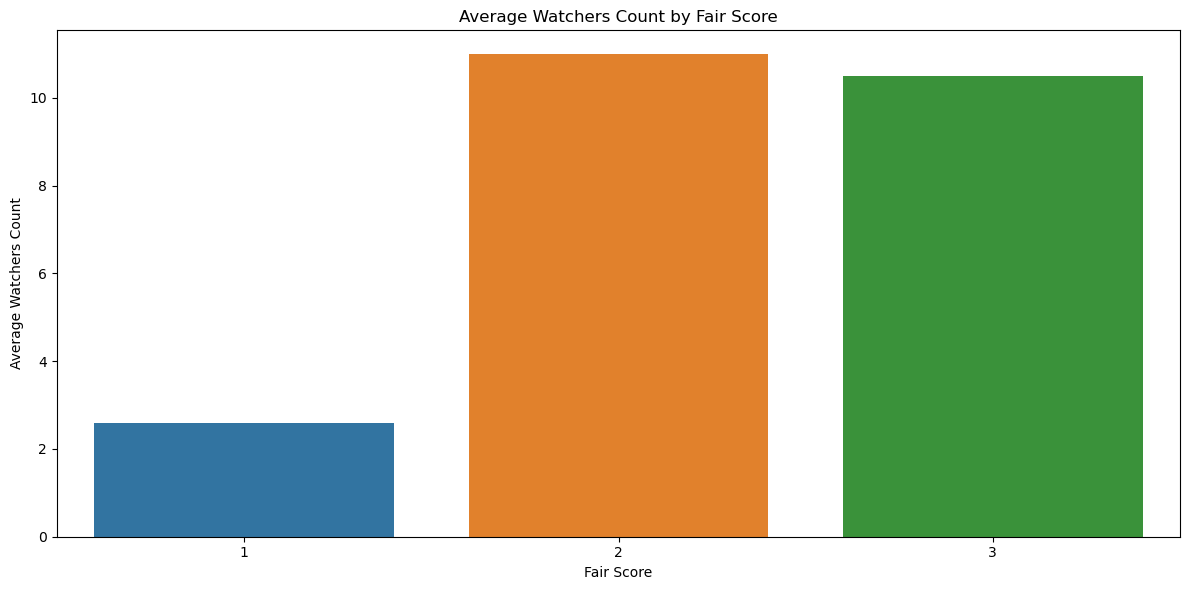

In [59]:
plt.figure(figsize=(12, 6))
sns.barplot(x='fair_score', y='watchers', data=df_grouped_with_fair_stats)
plt.title('Average Watchers Count by Fair Score')
plt.xlabel('Fair Score')
plt.ylabel('Average Watchers Count')
plt.tight_layout()
plt.show()

Plot 4: Average "Has Issues" Indicator by Fair Score

It is the average 

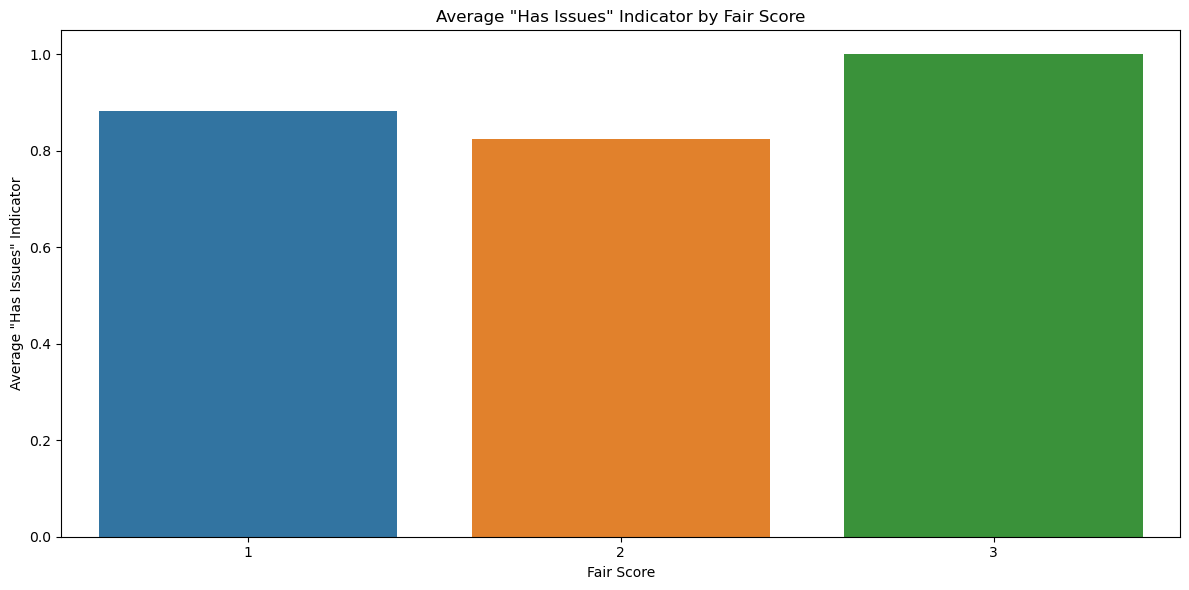

In [60]:
plt.figure(figsize=(12, 6))
sns.barplot(x='fair_score', y='has_issues', data=df_grouped_with_fair_stats)
plt.title('Average "Has Issues" Indicator by Fair Score')
plt.xlabel('Fair Score')
plt.ylabel('Average "Has Issues" Indicator')
plt.tight_layout()
plt.show()

Plot 5: Average Fork Indicator by Fair Score

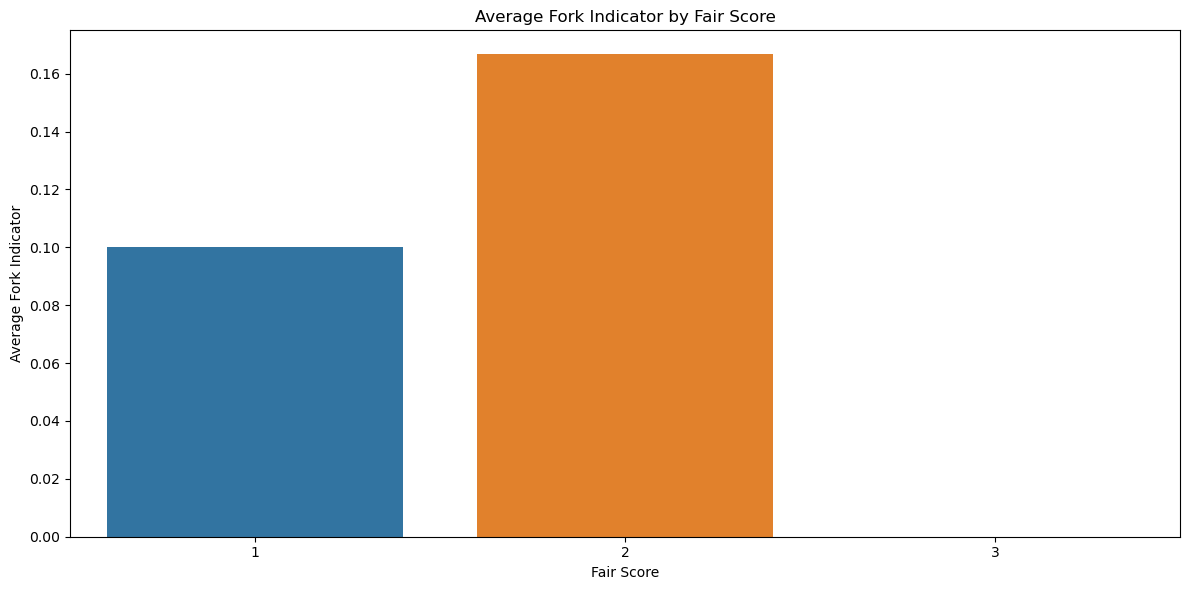

In [61]:
plt.figure(figsize=(12, 6))
sns.barplot(x='fair_score', y='fork', data=df_grouped_with_fair_stats)
plt.title('Average Fork Indicator by Fair Score')
plt.xlabel('Fair Score')
plt.ylabel('Average Fork Indicator')
plt.tight_layout()
plt.show()

# Analysis based on Languages

Need further refining of data based on top 5 languages. Now it gives some garbage values in analysis 

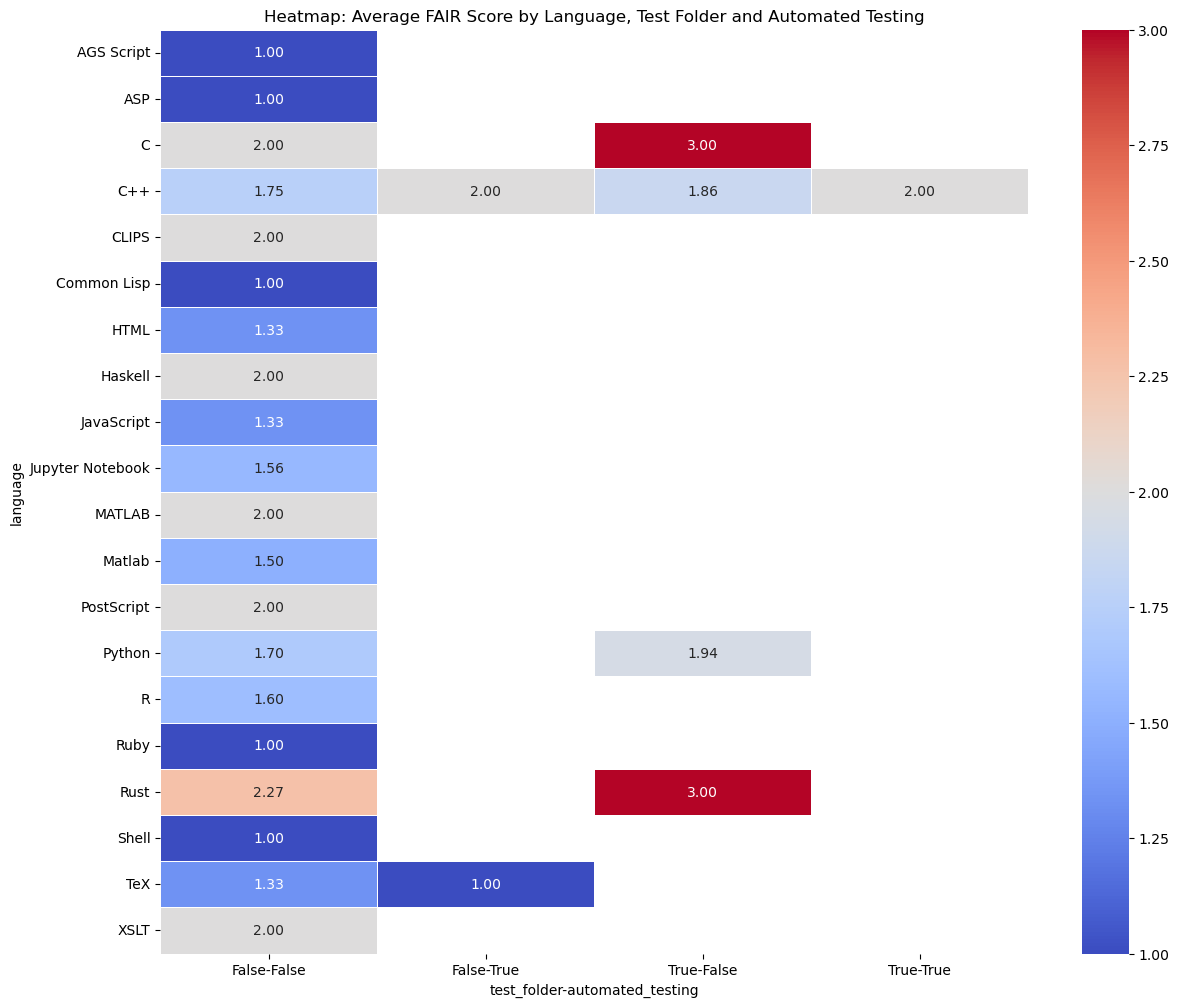

In [62]:
df_potsdam = df[df['organisation'] == 'university_of_potsdam']

# Group the data based on 'test_folder' and 'automated_testing' and then calculate the average 'fair_score'
grouped_fair_score = df_potsdam.groupby(['test_folder', 'automated_testing']).agg(
    avg_fair_score=pd.NamedAgg(column='fair_score', aggfunc='mean'),
    count=pd.NamedAgg(column='name', aggfunc='count')
).reset_index()

grouped_fair_score

# Group the data based on 'language', 'test_folder', and 'automated_testing', and then calculate the average 'fair_score'
grouped_fair_score_language = df_potsdam.groupby(['language', 'test_folder', 'automated_testing']).agg(
    avg_fair_score=pd.NamedAgg(column='fair_score', aggfunc='mean'),
    count=pd.NamedAgg(column='name', aggfunc='count')
).reset_index()

# Create a heatmap to visualize the average FAIR score with respect to language, test_folder, and automated_testing
plt.figure(figsize=(14, 12))
sns.heatmap(pd.pivot_table(grouped_fair_score_language, values='avg_fair_score', index=['language'], columns=['test_folder', 'automated_testing']), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap: Average FAIR Score by Language, Test Folder and Automated Testing')
plt.show()

In [17]:
# Filtering the DataFrame to include only these columns
df_filtered_with_lang_and_stats = df[relevant_columns]

# Grouping by 'language' and calculating the mean for each group
df_grouped_with_lang_stats = df_filtered_with_lang_and_stats.groupby(['language']).mean().reset_index()

/var/folders/80/92jv0gdd74n_p57srnsh1wcr0000gp/T/ipykernel_7368/1581870794.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped_with_lang_stats = df_filtered_with_lang_and_stats.groupby(['language']).mean().reset_index()


Plot 1: Average Forks Count by Language
Note:- Need to clean common files like GAMS from the visualisation 

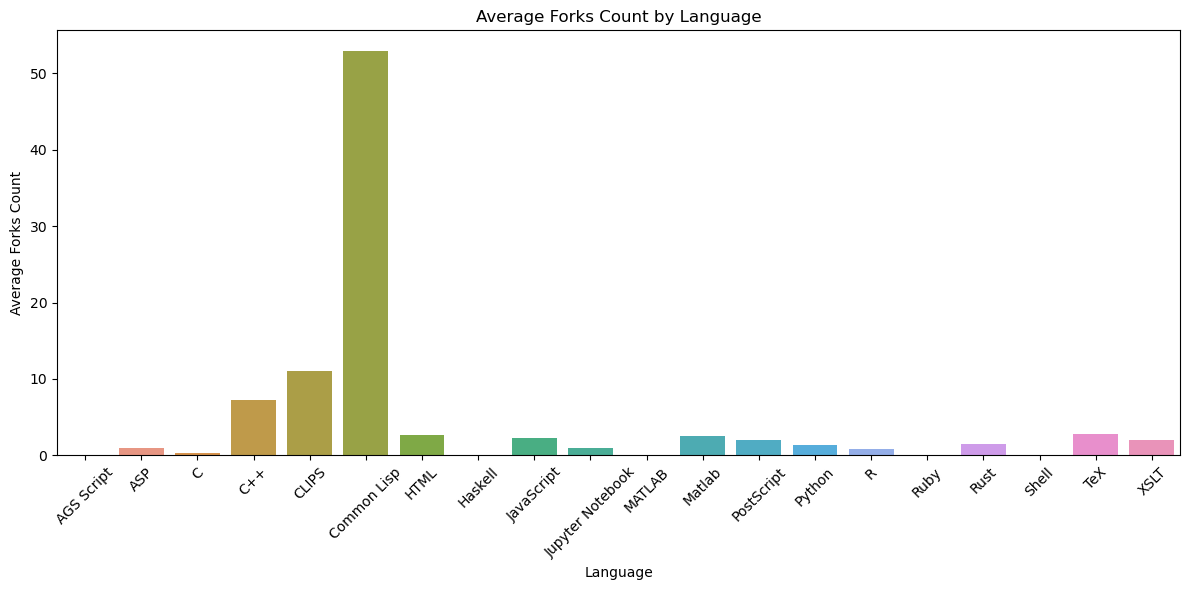

In [18]:
plt.figure(figsize=(12, 6))
sns.barplot(x='language', y='forks_count', data=df_grouped_with_lang_stats)
plt.title('Average Forks Count by Language')
plt.xlabel('Language')
plt.ylabel('Average Forks Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Plot 2: Average Stargazers Count by Language
Note:- Need to clean common files like GAMS from the visualisation 

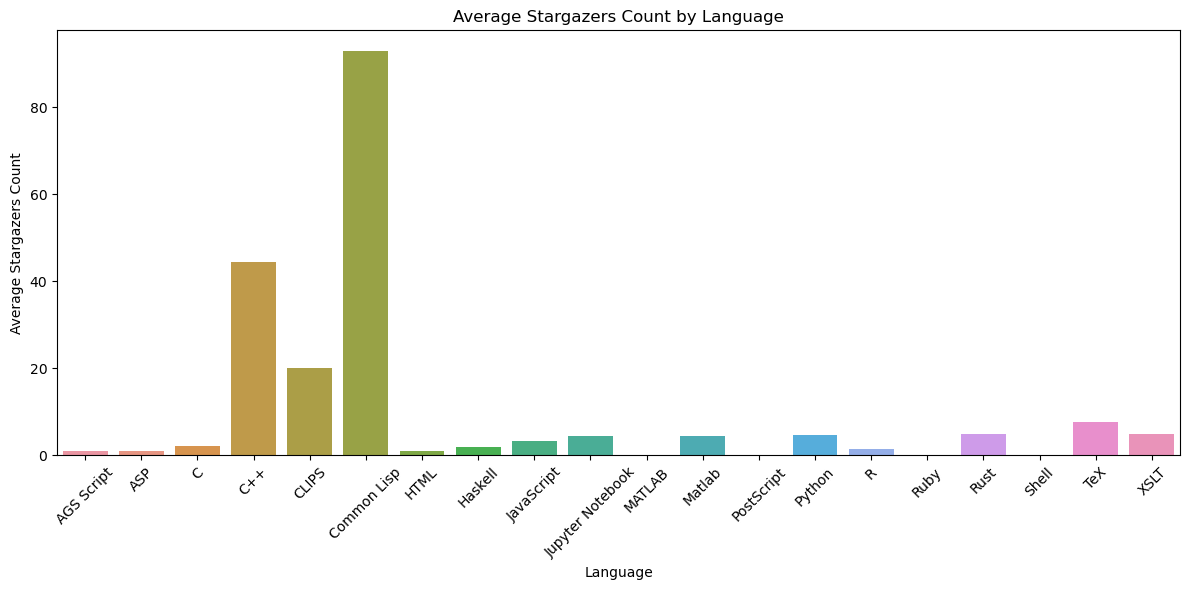

In [19]:
plt.figure(figsize=(12, 6))
sns.barplot(x='language', y='stargazers_count', data=df_grouped_with_lang_stats)
plt.title('Average Stargazers Count by Language')
plt.xlabel('Language')
plt.ylabel('Average Stargazers Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Plot 3: Average Watchers Count by Language
Note:- Need to clean common files like GAMS from the visualisation 

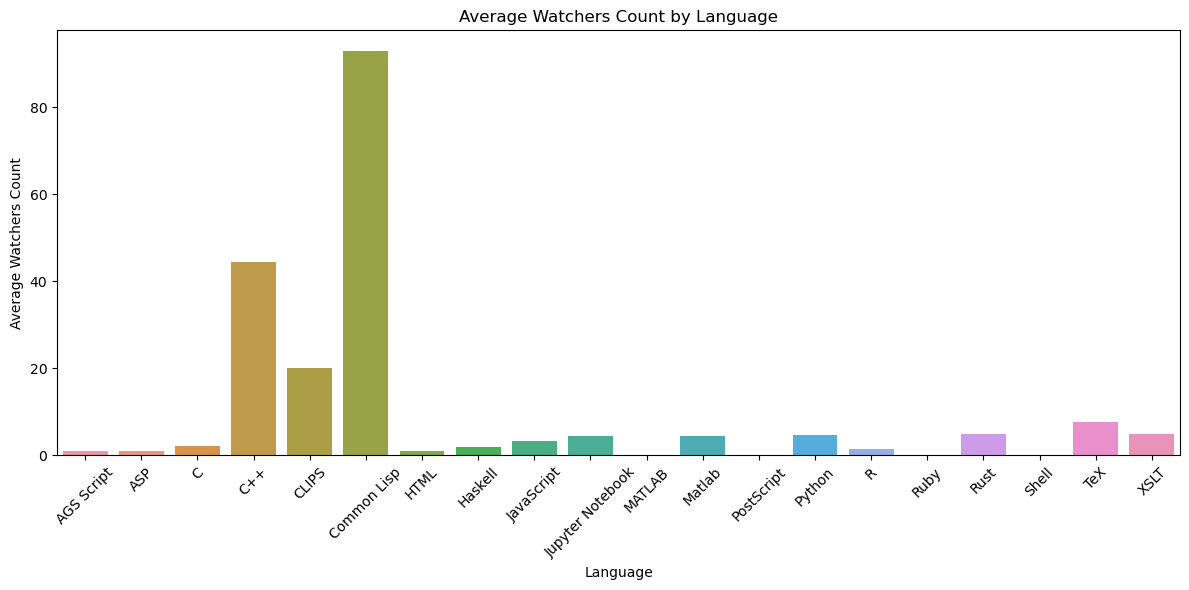

In [20]:
plt.figure(figsize=(12, 6))
sns.barplot(x='language', y='watchers', data=df_grouped_with_lang_stats)
plt.title('Average Watchers Count by Language')
plt.xlabel('Language')
plt.ylabel('Average Watchers Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Plot 4: Average "Has Issues" Indicator by Language
Note:- Need to clean common files like GAMS from the visualisation 

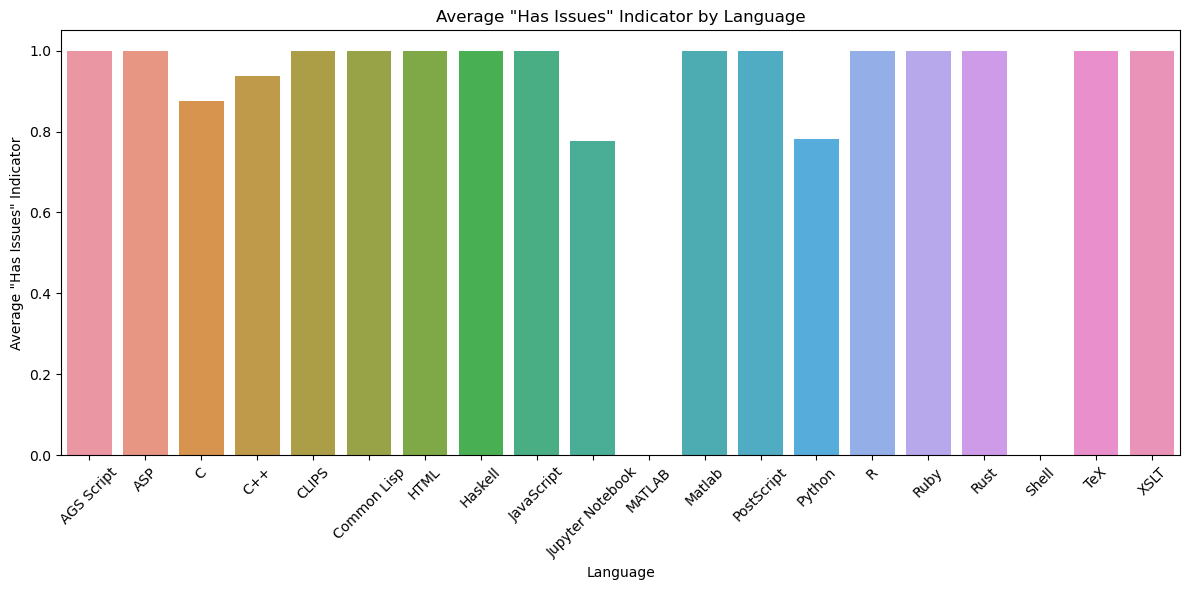

In [21]:
plt.figure(figsize=(12, 6))
sns.barplot(x='language', y='has_issues', data=df_grouped_with_lang_stats)
plt.title('Average "Has Issues" Indicator by Language')
plt.xlabel('Language')
plt.ylabel('Average "Has Issues" Indicator')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Plot 5: Average Fork Indicator by Language
Note:- Need to clean common files like GAMS from the visualisation 

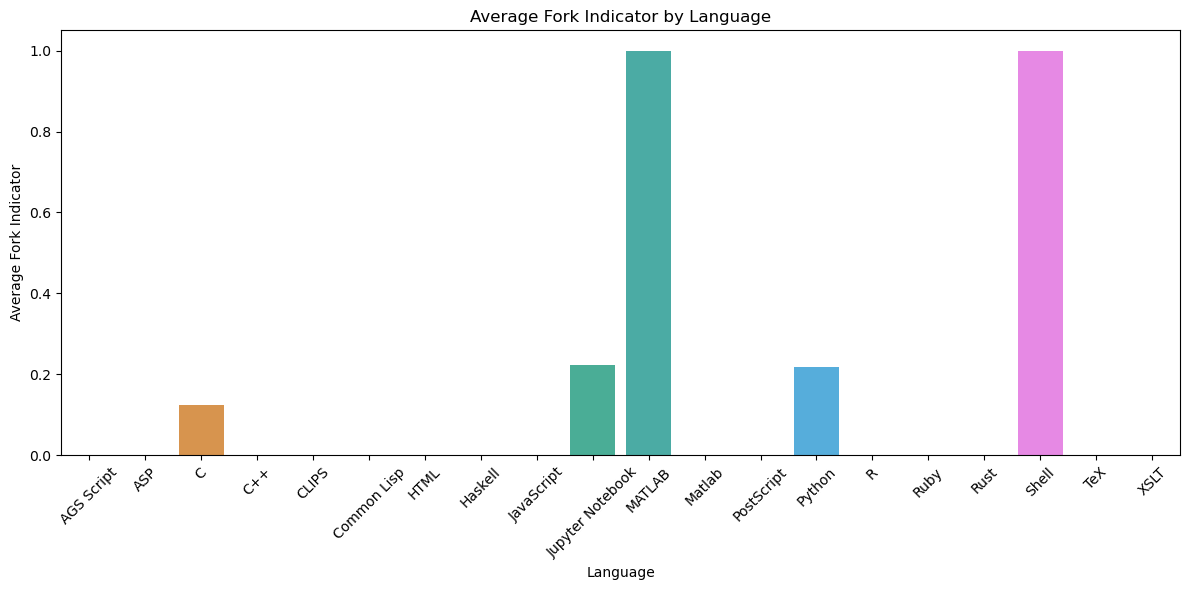

In [22]:
plt.figure(figsize=(12, 6))
sns.barplot(x='language', y='fork', data=df_grouped_with_lang_stats)
plt.title('Average Fork Indicator by Language')
plt.xlabel('Language')
plt.ylabel('Average Fork Indicator')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Analysis on testing and automated testing 

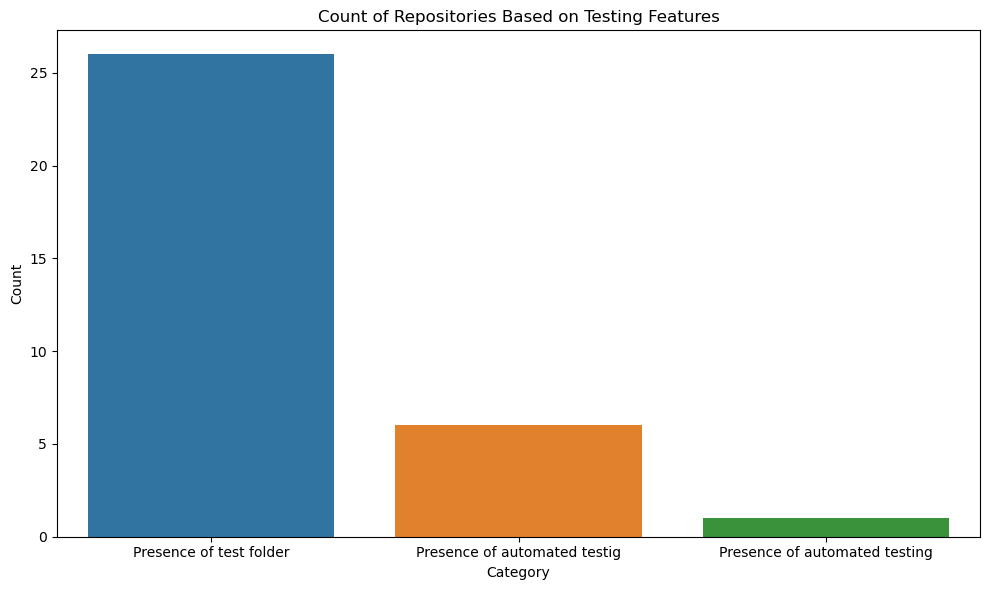

In [23]:
# Count the total number of repositories where 'test_folder' is True, 'automated_testing' is True, and both are True
count_test_folder_true = df[df['test_folder']].shape[0]
count_automated_testing_true = df[df['automated_testing']].shape[0]
count_both_true = df[df['test_folder'] & df['automated_testing']].shape[0]

count_test_folder_true, count_automated_testing_true, count_both_true

# Prepare data for visualization
count_data = {
    'Category': ['Presence of test folder', 'Presence of automated testig', 'Presence of automated testing'],
    'Count': [count_test_folder_true, count_automated_testing_true, count_both_true]
}

count_df = pd.DataFrame(count_data)

# Visualize the counts
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Count', data=count_df)
plt.title('Count of Repositories Based on Testing Features')
plt.xlabel('Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Testing and automated testing analysis with langauges 

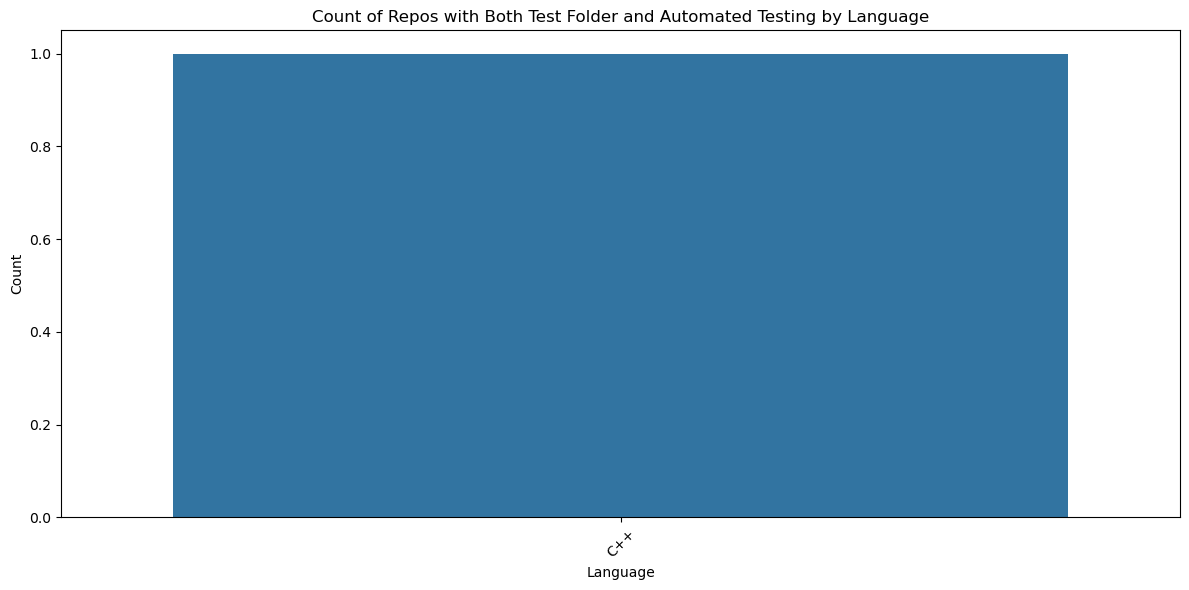

In [24]:
# Filter the DataFrame where both 'test_folder' and 'automated_testing' are True
df_filtered_both_true = df[df['test_folder'] & df['automated_testing']]

# Count the occurrences of each language under these conditions
count_by_lang_both_true = df_filtered_both_true.groupby('language').size().reset_index(name='Count')

# Visualize the counts by language
plt.figure(figsize=(12, 6))
sns.barplot(x='language', y='Count', data=count_by_lang_both_true)
plt.title('Count of Repos with Both Test Folder and Automated Testing by Language')
plt.xlabel('Language')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

visualise where automated_testing is true but test_folder is false 
There are some projects. where the test folder is absent but keyword test is present in make/ .yml file

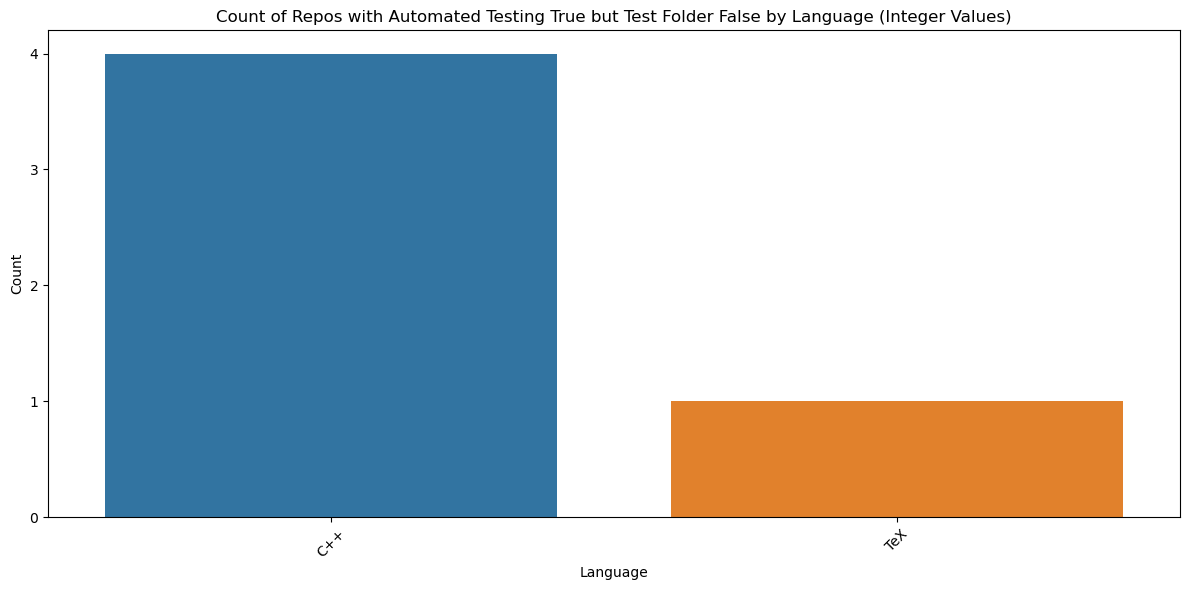

In [25]:
# Filter the DataFrame where 'automated_testing' is True but 'test_folder' is False
df_filtered_auto_true_test_false = df[df['automated_testing'] & ~df['test_folder']]

# Count the occurrences of each language under these conditions
count_by_lang_auto_true_test_false = df_filtered_auto_true_test_false.groupby('language').size().reset_index(name='Count')


# Adjust the visualization to show only integer tick labels on the y-axis
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='language', y='Count', data=count_by_lang_auto_true_test_false)
plt.title('Count of Repos with Automated Testing True but Test Folder False by Language (Integer Values)')
plt.xlabel('Language')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Set y-ticks to integer values
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.tight_layout()
plt.show()

## Heatmaps 

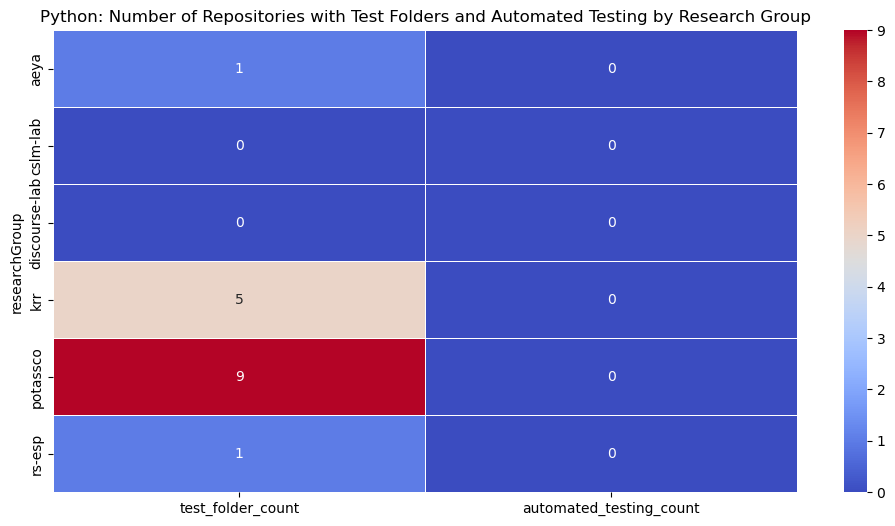

In [30]:
# Filter the data for Python and group by 'researchGroup'
python_data = df[(df['organisation'] == 'university_of_potsdam') & (df['language'] == 'Python')]
python_grouped = python_data.groupby('researchGroup').agg(
    test_folder_count=pd.NamedAgg(column='test_folder', aggfunc='sum'),
    automated_testing_count=pd.NamedAgg(column='automated_testing', aggfunc='sum')
).reset_index()

# Create a heatmap for Python
plt.figure(figsize=(12, 6))
sns.heatmap(python_grouped.set_index('researchGroup'), annot=True, fmt="g", cmap='coolwarm', linewidths=.5)
plt.title('Python: Number of Repositories with Test Folders and Automated Testing by Research Group')
plt.show()



Counts of True/False for automated_testing by fair_score:
automated_testing  False  True 
fair_score                     
1                   59.0    1.0
2                  103.0    5.0
3                    6.0    NaN


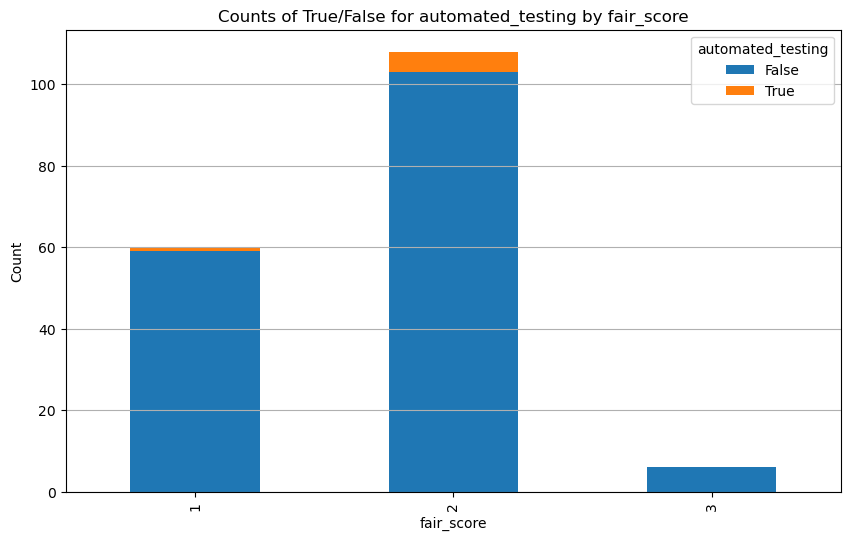


Counts of True/False for test_folder by fair_score:
test_folder  False  True 
fair_score               
1               57      3
2               88     20
3                3      3


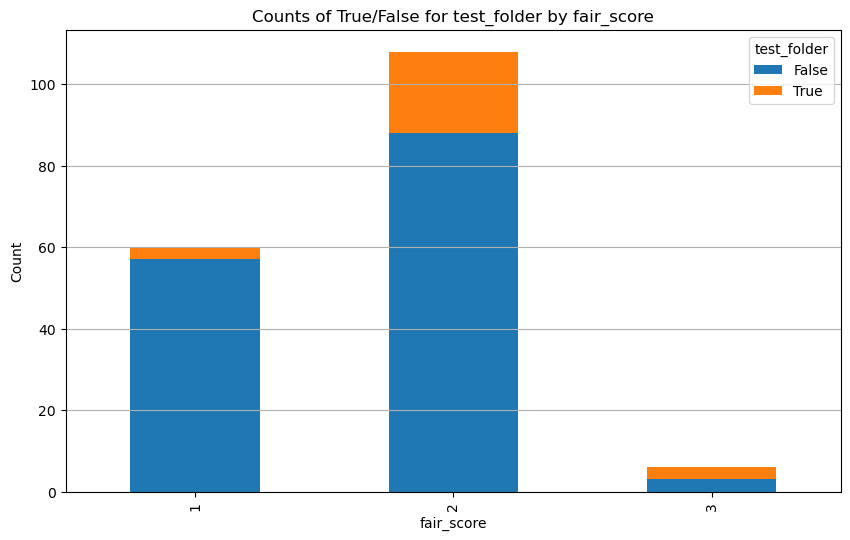


Counts of True/False for actions by fair_score:
actions     False
fair_score       
1              60
2             108
3               6


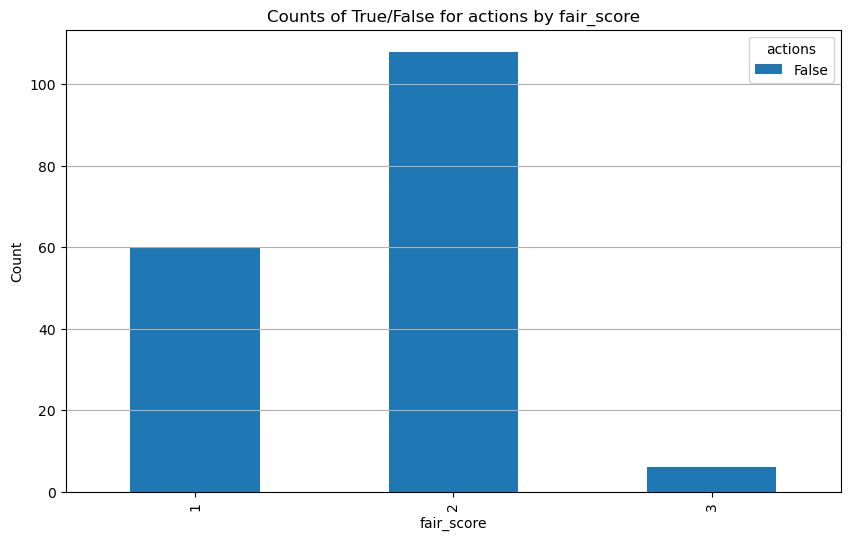

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

def count_values_by_fair_score(dataframe, column_name):
    # Group by 'fair_score' and the given column, then count occurrences
    grouped = dataframe.groupby(['fair_score', column_name]).size().unstack()
    return grouped

if __name__ == "__main__":
    # Read the CSV file
    file_name = "combined.csv"
    data = pd.read_csv(file_name)

    columns_to_check = ["automated_testing", "test_folder", "actions"]
    results = {}

    # Count True/False values for each column based on 'fair_score' values
    for col in columns_to_check:
        results[col] = count_values_by_fair_score(data, col)

    # Print and visualize the results
    for col, result_df in results.items():
        print(f"\nCounts of True/False for {col} by fair_score:")
        print(result_df)

        # Visualization
        result_df.plot(kind='bar', stacked=True, figsize=(10, 6))
        plt.ylabel('Count')
        plt.title(f"Counts of True/False for {col} by fair_score")
        plt.grid(axis='y')
        plt.legend(title=col)
        plt.show()




Counts of True/False for automated_testing by fair_score:
automated_testing  False  True 
fair_score                     
1                    452      3
2                    377     25
3                     24     17
4                     15     30


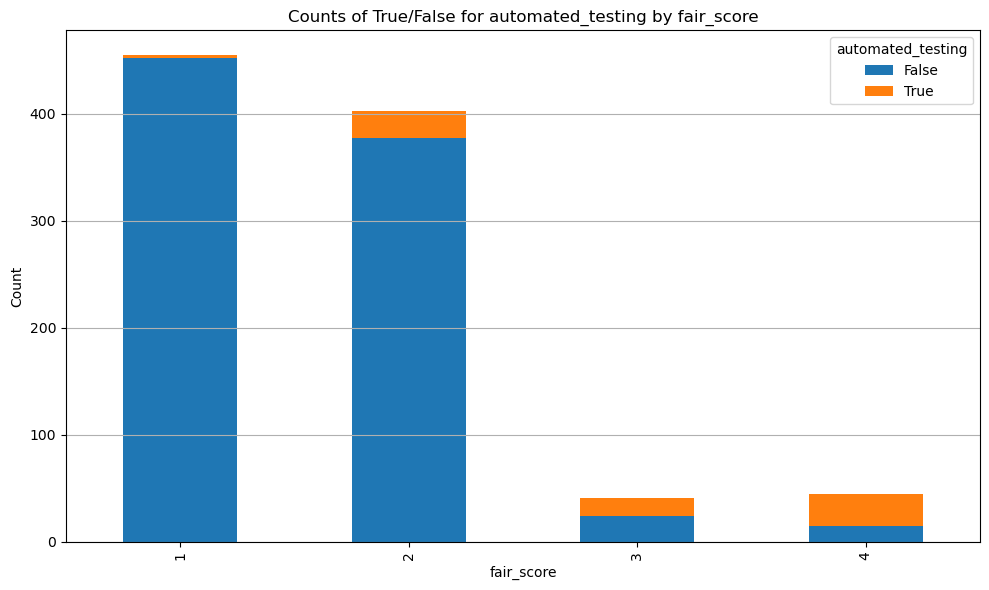


Counts of True/False for test_folder by fair_score:
test_folder  False  True 
fair_score               
1              438     17
2              316     86
3               16     25
4                1     44


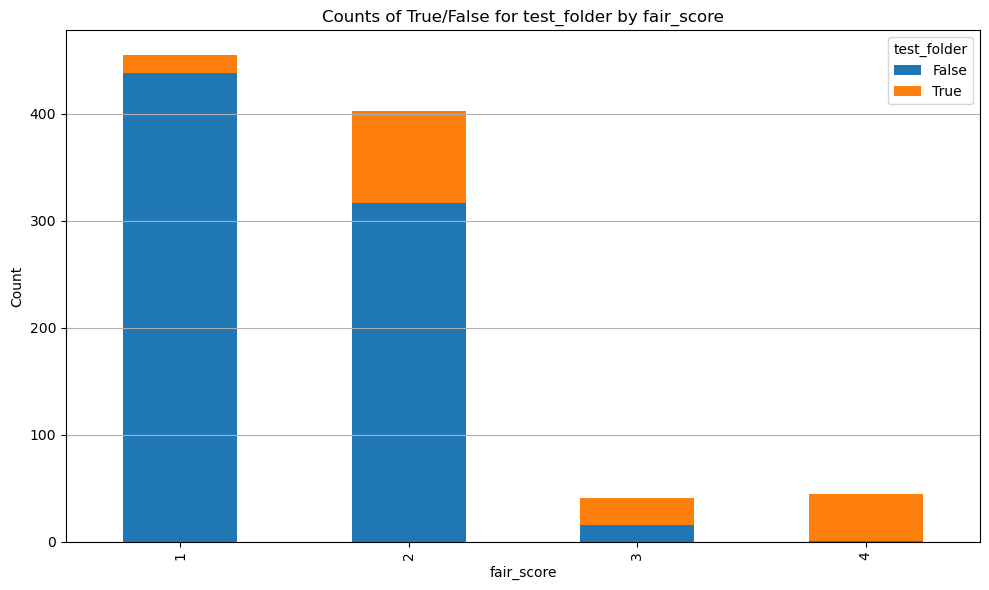


Counts of True/False for actions by fair_score:
actions     False
fair_score       
1             444
2             402
3              41
4              45


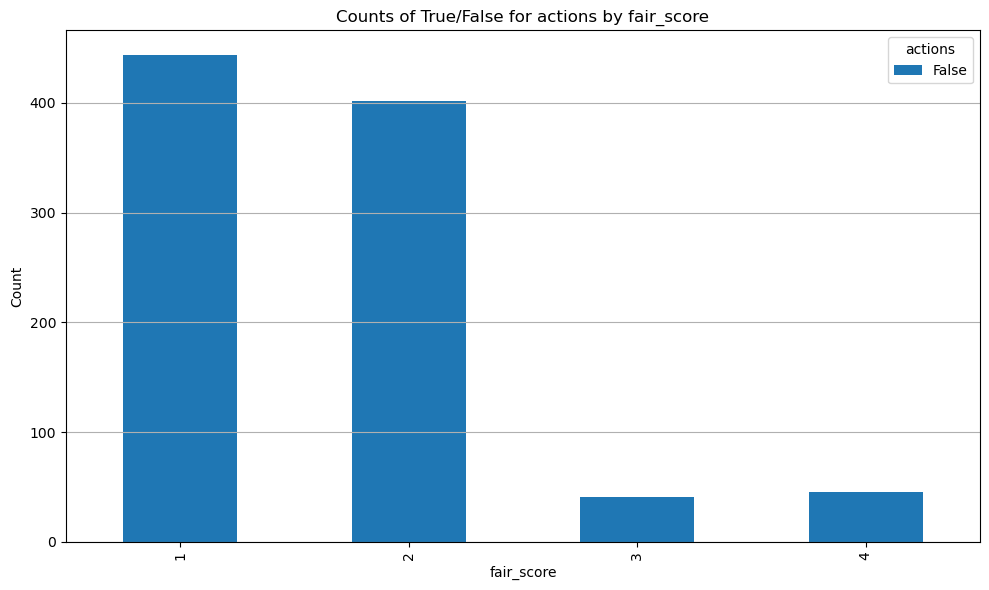

In [129]:
import pandas as pd
import matplotlib.pyplot as plt

def count_values_by_fair_score(dataframe, column_name):
    # Group by 'fair_score' and the given column, then count occurrences
    grouped = dataframe.groupby(['fair_score', column_name]).size().unstack().fillna(0)
    return grouped

if __name__ == "__main__":
    # Read the CSV file
    file_name = "combined.csv"
    data = pd.read_csv(file_name)

    columns_to_check = ["automated_testing", "test_folder", "actions"]
    results = {}

    # Ensure all values from 0 to 5 are present in fair_score column
    for i in range(6):
        if i not in data['fair_score'].unique():
            data = pd.concat([data, pd.DataFrame({'fair_score': [i]})])

    # Count True/False values for each column based on 'fair_score' values
    for col in columns_to_check:
        results[col] = count_values_by_fair_score(data, col)

    # Print and visualize the results
    for col, result_df in results.items():
        print(f"\nCounts of True/False for {col} by fair_score:")
        print(result_df)

        # Visualization
        result_df.plot(kind='bar', stacked=True, figsize=(10, 6))
        plt.ylabel('Count')
        plt.title(f"Counts of True/False for {col} by fair_score")
        plt.grid(axis='y')
        plt.legend(title=col, loc='upper right')
        plt.tight_layout()
        plt.show()


     fair_score                                       organisation  \
321           2                              university_of_potsdam   
662           1                           hasso_plattner_institute   
678           4      potsdam_institute_for_climate_impact_research   
679           4      potsdam_institute_for_climate_impact_research   
680           4      potsdam_institute_for_climate_impact_research   
681           4      potsdam_institute_for_climate_impact_research   
685           4      potsdam_institute_for_climate_impact_research   
686           4      potsdam_institute_for_climate_impact_research   
688           4      potsdam_institute_for_climate_impact_research   
692           3      potsdam_institute_for_climate_impact_research   
694           4      potsdam_institute_for_climate_impact_research   
696           4      potsdam_institute_for_climate_impact_research   
697           3      potsdam_institute_for_climate_impact_research   
698           3     

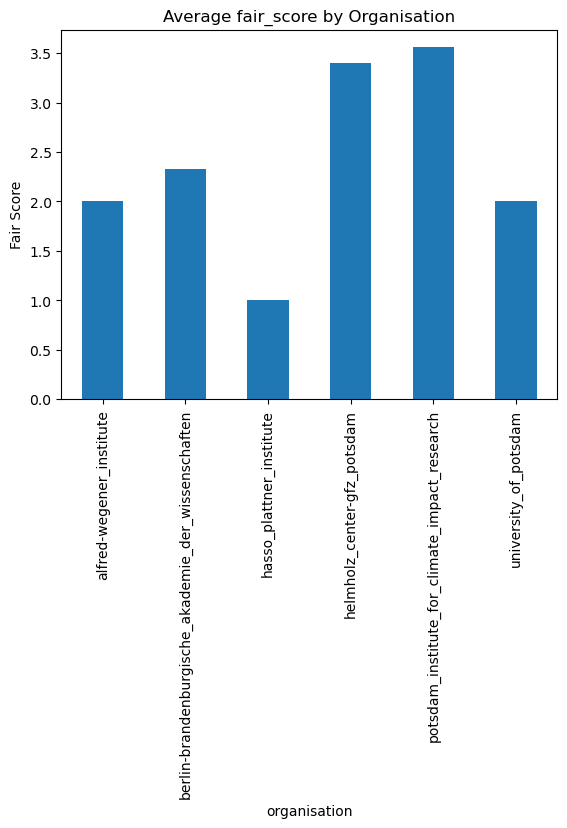

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Read the CSV file
data = pd.read_csv('combined.csv')

# Step 2: Filter the rows
filtered_data = data[(data["automated_testing"] == True) & (data["test_folder"] == True)]

# Step 3: Print the specified columns
print(filtered_data[["fair_score", "organisation", "researchGroup"]])

# Step 4: Display the "description"
print("\nDescriptions:")
for desc in filtered_data["description"]:
    print(desc)

# Step 5: Display some basic graphs
# As an example, let's plot a bar chart of "fair_score" grouped by "organisation"
grouped_data = filtered_data.groupby("organisation")["fair_score"].mean()
grouped_data.plot(kind="bar", title="Average fair_score by Organisation")
plt.ylabel("Fair Score")
plt.show()

# You can extend this to create other plots as per your needs


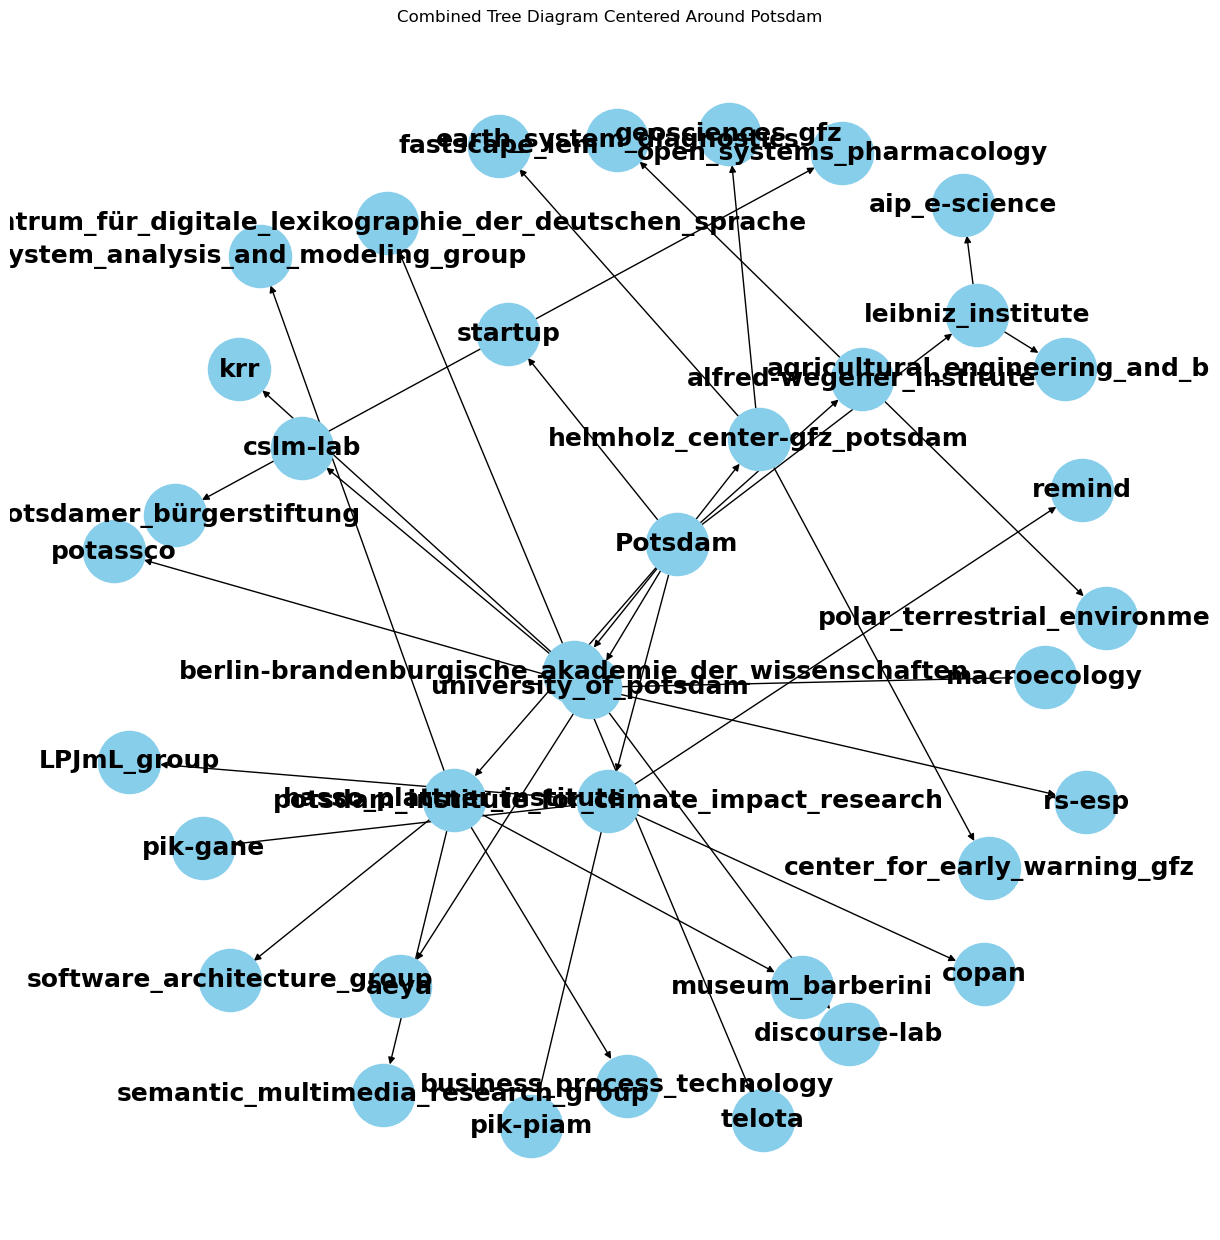

In [41]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('combined.csv')

# Create a directed graph
G = nx.DiGraph()

# Add the center node
center_node = "Potsdam"
G.add_node(center_node)

# Populate the graph from the DataFrame
for index, row in df.iterrows():
    org = row['organisation']
    group = row['researchGroup']

    G.add_node(org)
    G.add_node(group)

    G.add_edge(org, group)
    G.add_edge(center_node, org)

# Draw the combined graph
plt.figure(figsize=(12, 12))  # Set figure size for better visibility
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw(G, pos, with_labels=True, node_color="skyblue", font_weight="bold", node_size=2000, font_size=18)
plt.title("Combined Tree Diagram Centered Around Potsdam")
plt.show()


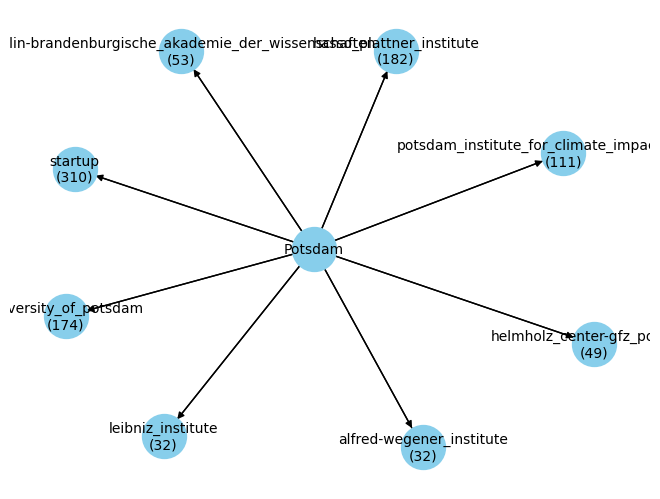

In [44]:


# Read the CSV into a DataFrame
df = pd.read_csv('combined.csv')




/var/folders/80/92jv0gdd74n_p57srnsh1wcr0000gp/T/ipykernel_40926/4225599242.py:8: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



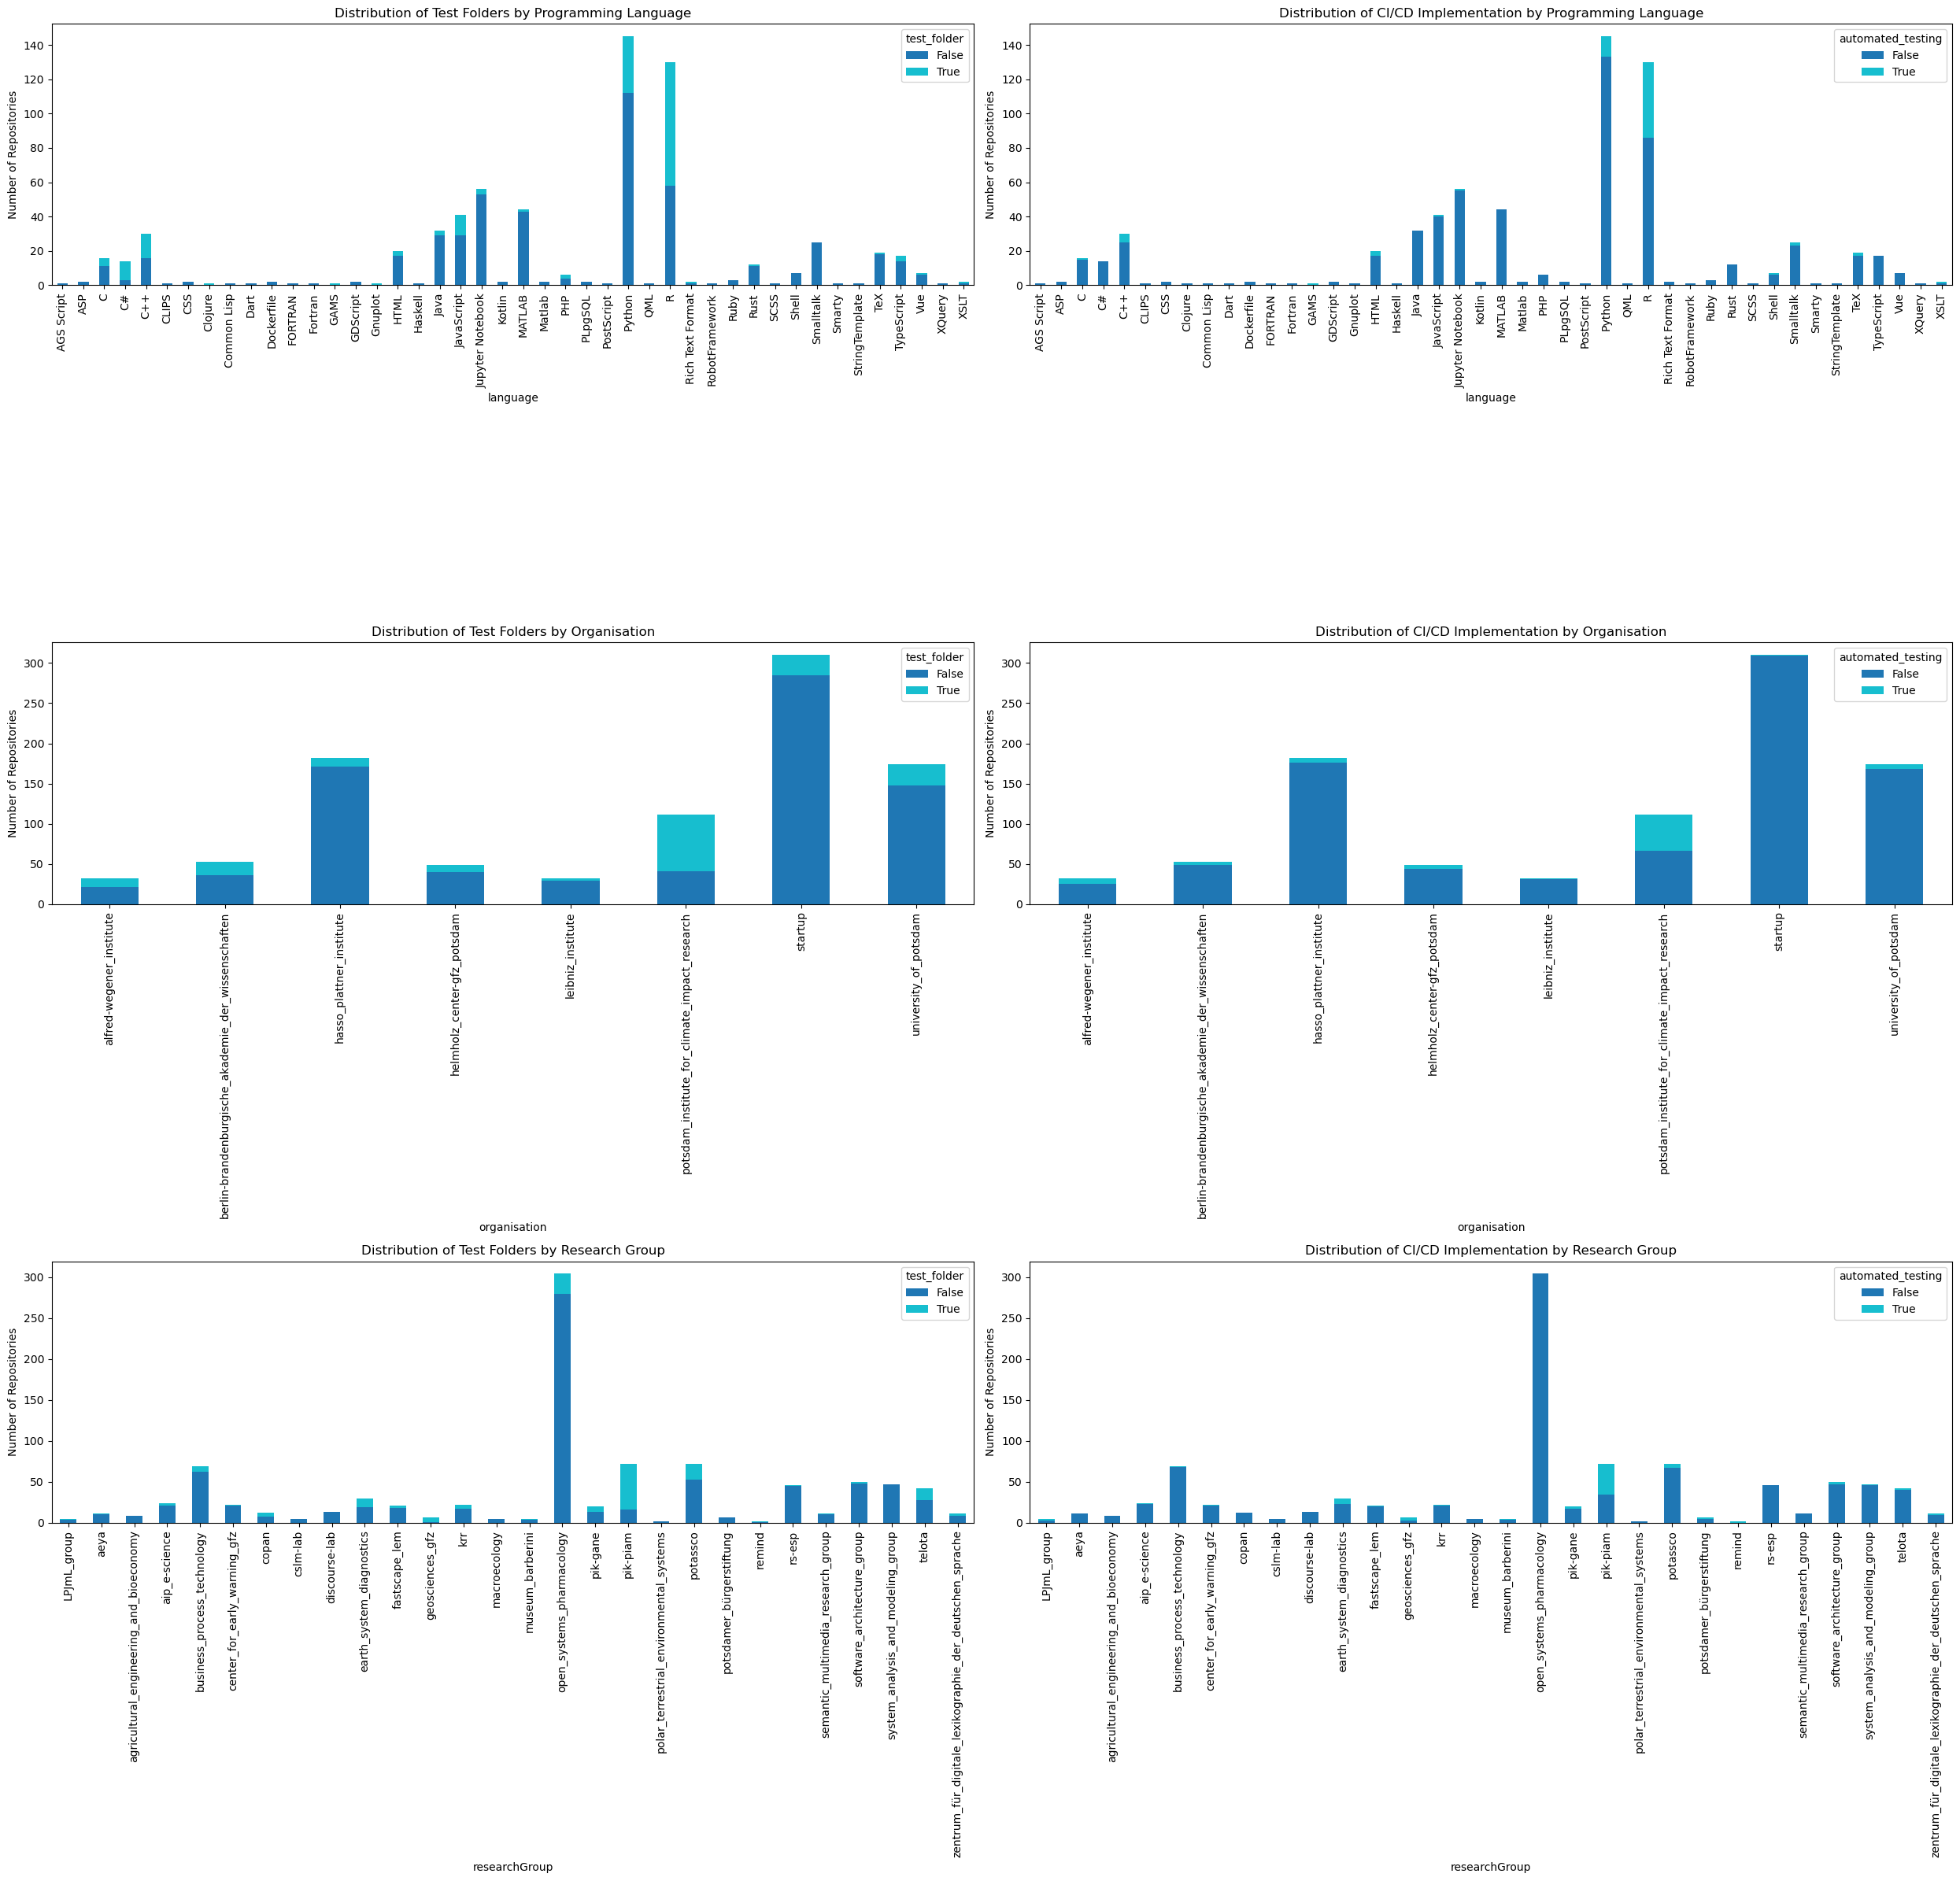

In [45]:
# Import additional visualization libraries
import matplotlib.colors as mcolors

# Initialize a 3x2 grid of subplots with larger size for better visuals
fig, axes = plt.subplots(3, 2, figsize=(25, 24), subplot_kw={'aspect': 'auto'})

# Create a colormap for a better visual experience
colormap = plt.cm.get_cmap('tab10')

# Plot 1: Distribution of test_folder by Programming Language with a pie chart
lang_test_folder = df.groupby(['language', 'test_folder']).size().unstack().fillna(0)
lang_test_folder.plot(kind='bar', stacked=True, colormap=colormap, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Test Folders by Programming Language')
axes[0, 0].set_ylabel('Number of Repositories')

# Plot 2: Distribution of automated_testing by Programming Language with a pie chart
lang_auto_test = df.groupby(['language', 'automated_testing']).size().unstack().fillna(0)
lang_auto_test.plot(kind='bar', stacked=True, colormap=colormap, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of CI/CD Implementation by Programming Language')
axes[0, 1].set_ylabel('Number of Repositories')

# Plot 3: Distribution of test_folder by Organisation with a donut chart
org_test_folder = df.groupby(['organisation', 'test_folder']).size().unstack().fillna(0)
org_test_folder.plot(kind='bar', stacked=True, colormap=colormap, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Test Folders by Organisation')
axes[1, 0].set_ylabel('Number of Repositories')

# Plot 4: Distribution of automated_testing by Organisation with a donut chart
org_auto_test = df.groupby(['organisation', 'automated_testing']).size().unstack().fillna(0)
org_auto_test.plot(kind='bar', stacked=True, colormap=colormap, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of CI/CD Implementation by Organisation')
axes[1, 1].set_ylabel('Number of Repositories')

# Plot 5: Distribution of test_folder by Research Group with a donut chart
if 'test_folder' in df.columns and 'researchGroup' in df.columns:
    rg_test_folder = df.groupby(['researchGroup', 'test_folder']).size().unstack().fillna(0)
    rg_test_folder.plot(kind='bar', stacked=True, colormap=colormap, ax=axes[2, 0])
    axes[2, 0].set_title('Distribution of Test Folders by Research Group')
    axes[2, 0].set_ylabel('Number of Repositories')

# Plot 6: Distribution of automated_testing by Research Group with a donut chart
if 'automated_testing' in df.columns and 'researchGroup' in df.columns:
    rg_auto_test = df.groupby(['researchGroup', 'automated_testing']).size().unstack().fillna(0)
    rg_auto_test.plot(kind='bar', stacked=True, colormap=colormap, ax=axes[2, 1])
    axes[2, 1].set_title('Distribution of CI/CD Implementation by Research Group')
    axes[2, 1].set_ylabel('Number of Repositories')

# Adjust layout and legend
plt.tight_layout()
plt.show()
